In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns                      
import statistics as stat
import scipy as sc #libreria de algoritmos
import matplotlib.pyplot as plt



In [2]:
csv_files_functions = [
     "demanda_real_peninsula_2019_2024",
        "demanda_programada_peninsula_2019_2024",
        "demanda_prevista_peninsula_2019_2024",
        "demanda_programada_comercializadores_2019_2024",
        "demanda_real_prevista_nacional_2019_2024",
        "demanda_real_programada_nacional_2019_2024",
        "generacion_tiemporeal_renovable_2019_2024",
        "generacion_tiempo_real_no_renovable_2019_2024",
]


In [3]:
folder_path = "datosEsios/"

for variable_name in csv_files_functions:
    file_name = f"{variable_name}.csv"  # Construir el nombre del archivo esperado
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Verificar que el archivo existe
        try:
            # Leer el archivo CSV y asignarlo a una variable
            globals()[variable_name] = pd.read_csv(file_path)
            print(f"Archivo '{file_name}' leído y almacenado como '{variable_name}'.")
        except Exception as e:
            print(f"Error leyendo el archivo '{file_name}': {e}")
    else:
        print(f"Archivo '{file_name}' no encontrado en la carpeta.")

Archivo 'demanda_real_peninsula_2019_2024.csv' leído y almacenado como 'demanda_real_peninsula_2019_2024'.
Archivo 'demanda_programada_peninsula_2019_2024.csv' leído y almacenado como 'demanda_programada_peninsula_2019_2024'.
Archivo 'demanda_prevista_peninsula_2019_2024.csv' leído y almacenado como 'demanda_prevista_peninsula_2019_2024'.
Archivo 'demanda_programada_comercializadores_2019_2024.csv' leído y almacenado como 'demanda_programada_comercializadores_2019_2024'.
Archivo 'demanda_real_prevista_nacional_2019_2024.csv' leído y almacenado como 'demanda_real_prevista_nacional_2019_2024'.
Archivo 'demanda_real_programada_nacional_2019_2024.csv' leído y almacenado como 'demanda_real_programada_nacional_2019_2024'.
Archivo 'generacion_tiemporeal_renovable_2019_2024.csv' leído y almacenado como 'generacion_tiemporeal_renovable_2019_2024'.
Archivo 'generacion_tiempo_real_no_renovable_2019_2024.csv' leído y almacenado como 'generacion_tiempo_real_no_renovable_2019_2024'.


In [4]:
demanda_real_peninsula_2019_2024.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name
0,23128.0,2019-01-01T01:00:00.000+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península
1,23108.0,2019-01-01T01:10:00.000+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península
2,22889.0,2019-01-01T01:20:00.000+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península
3,22705.0,2019-01-01T01:30:00.000+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península
4,22548.0,2019-01-01T01:40:00.000+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península


# Gráficos EDA


<Axes: xlabel='value'>

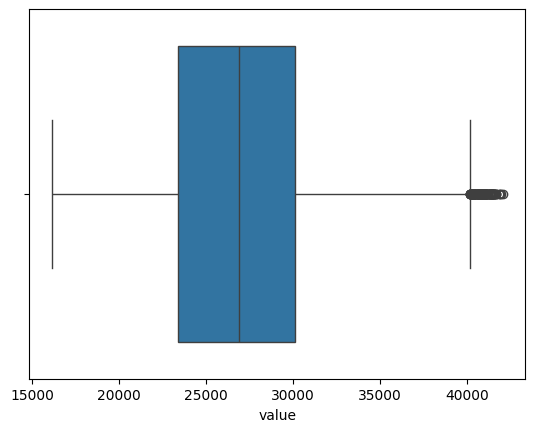

In [5]:
sns.boxplot(x=demanda_real_peninsula_2019_2024['value'])

<Axes: xlabel='value'>

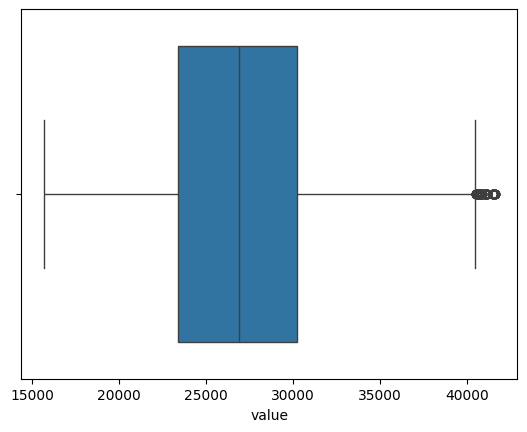

In [6]:
sns.boxplot(x=demanda_programada_peninsula_2019_2024['value'])

<Axes: xlabel='value'>

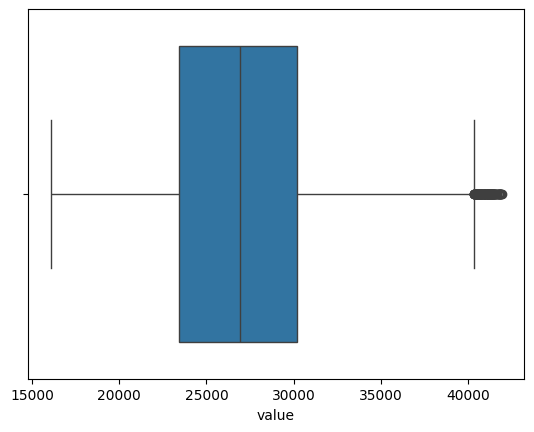

In [7]:
sns.boxplot(x=demanda_prevista_peninsula_2019_2024['value'])

<Axes: xlabel='value'>

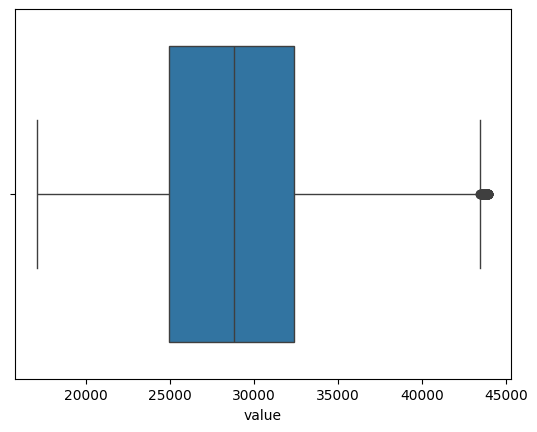

In [8]:
sns.boxplot(x=demanda_real_prevista_nacional_2019_2024['value'])

<Axes: xlabel='value'>

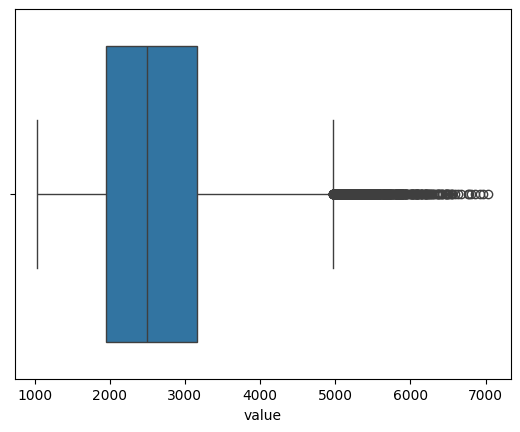

In [9]:
sns.boxplot(x=demanda_programada_comercializadores_2019_2024['value'])

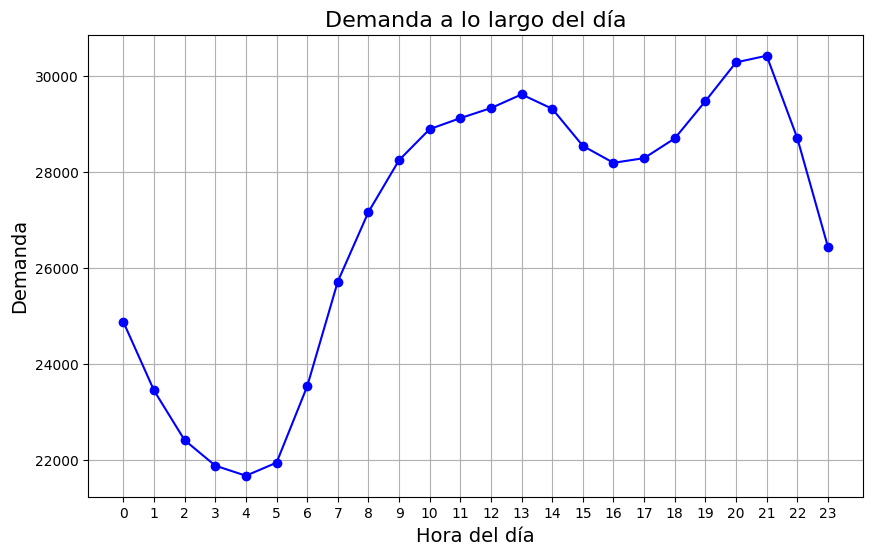

In [69]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'datetime' está en formato datetime y que no tenga zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Agrupar los datos por hora y calcular la media de demanda para cada hora
demanda_por_hora = demanda_real_peninsula_2019_2024.groupby(demanda_real_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(demanda_por_hora.index, demanda_por_hora.values, marker='o', linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Demanda a lo largo del día', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Demanda', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)
plt.grid(True)

# Mostrar el gráfico
plt.show()

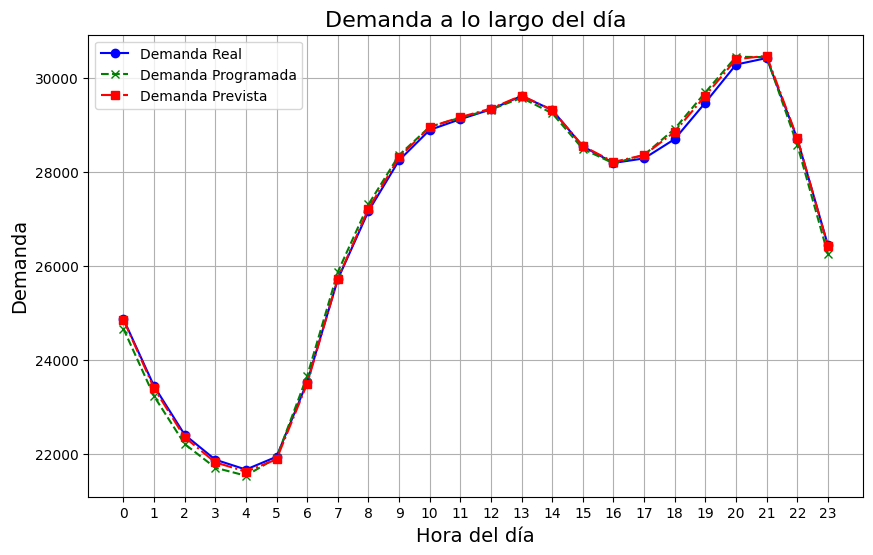

In [70]:
import matplotlib.pyplot as plt

# Asegúrate de que las columnas 'datetime' están en formato datetime y que no tengan zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

demanda_programada_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_programada_peninsula_2019_2024['datetime'], utc=True)
demanda_programada_peninsula_2019_2024['datetime'] = demanda_programada_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

demanda_prevista_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_prevista_peninsula_2019_2024['datetime'], utc=True)
demanda_prevista_peninsula_2019_2024['datetime'] = demanda_prevista_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Agrupar los datos por hora y calcular la media de demanda para cada hora
demanda_real_por_hora = demanda_real_peninsula_2019_2024.groupby(demanda_real_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()
demanda_programada_por_hora = demanda_programada_peninsula_2019_2024.groupby(demanda_programada_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()
demanda_prevista_por_hora = demanda_prevista_peninsula_2019_2024.groupby(demanda_prevista_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Añadir las tres líneas al gráfico
plt.plot(demanda_real_por_hora.index, demanda_real_por_hora.values, marker='o', linestyle='-', color='b', label='Demanda Real')
plt.plot(demanda_programada_por_hora.index, demanda_programada_por_hora.values, marker='x', linestyle='--', color='g', label='Demanda Programada')
plt.plot(demanda_prevista_por_hora.index, demanda_prevista_por_hora.values, marker='s', linestyle='-.', color='r', label='Demanda Prevista')

# Añadir títulos, etiquetas y leyenda
plt.title('Demanda a lo largo del día', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Demanda', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


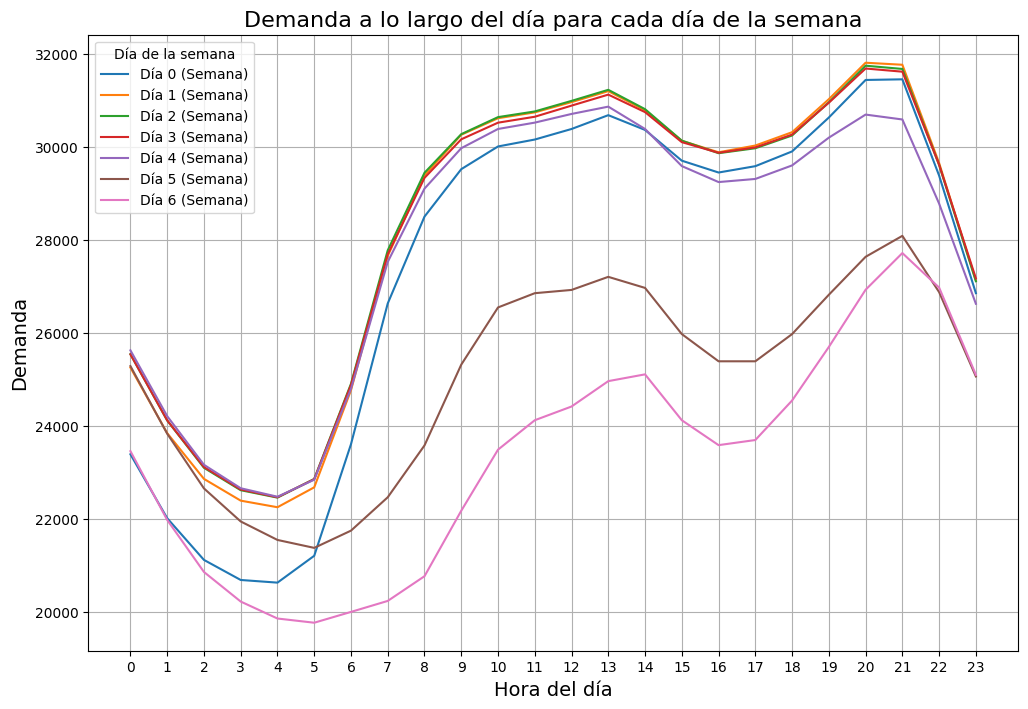

In [71]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'datetime' está en formato datetime y que no tenga zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Añadir una columna con el día de la semana (lunes=0, domingo=6)
demanda_real_peninsula_2019_2024['dia_semana'] = demanda_real_peninsula_2019_2024['datetime'].dt.dayofweek

# Agrupar los datos por día de la semana y hora, y calcular la media de demanda para cada combinación
demanda_por_dia_hora = demanda_real_peninsula_2019_2024.groupby(['dia_semana', demanda_real_peninsula_2019_2024['datetime'].dt.hour])['value'].mean().unstack(fill_value=0)

# Crear los gráficos
plt.figure(figsize=(12, 8))

# Graficar la demanda a lo largo de las horas para cada día de la semana
for dia in range(7):
    plt.plot(demanda_por_dia_hora.columns, demanda_por_dia_hora.loc[dia], label=f'Día {dia} (Semana)')

# Añadir títulos y etiquetas
plt.title('Demanda a lo largo del día para cada día de la semana', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Demanda', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)
plt.grid(True)
plt.legend(title='Día de la semana')

# Mostrar el gráfico
plt.show()


# Preprocesado

In [10]:
demanda_real_peninsula_2019_2024.dtypes

value           float64
datetime         object
datetime_utc     object
tz_time          object
geo_id            int64
geo_name         object
dtype: object

In [11]:
demanda_real_peninsula_2019_2024.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name
0,23128.0,2019-01-01T01:00:00.000+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península
1,23108.0,2019-01-01T01:10:00.000+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península
2,22889.0,2019-01-01T01:20:00.000+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península
3,22705.0,2019-01-01T01:30:00.000+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península
4,22548.0,2019-01-01T01:40:00.000+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península


In [12]:
# Asegurarse de que la columna 'datetime' se convierte correctamente, manejando la zona horaria
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)

# Si prefieres convertir la fecha a la zona horaria local después de convertir a UTC
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')  # Ajusta a la zona horaria local si es necesario

# Añadir la columna 'dia_semana' con el nombre del día de la semana
demanda_real_peninsula_2019_2024['dia_semana'] = demanda_real_peninsula_2019_2024['datetime'].dt.day_name()

# Mostrar las primeras filas para verificar
print(demanda_real_peninsula_2019_2024[['datetime', 'dia_semana']].head())


                   datetime dia_semana
0 2019-01-01 01:00:00+01:00    Tuesday
1 2019-01-01 01:10:00+01:00    Tuesday
2 2019-01-01 01:20:00+01:00    Tuesday
3 2019-01-01 01:30:00+01:00    Tuesday
4 2019-01-01 01:40:00+01:00    Tuesday


In [13]:
# Asegurarse de que la columna 'datetime' se convierte correctamente, manejando la zona horaria
demanda_programada_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_programada_peninsula_2019_2024['datetime'], utc=True)

# Si prefieres convertir la fecha a la zona horaria local después de convertir a UTC
demanda_programada_peninsula_2019_2024['datetime'] = demanda_programada_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')  # Ajusta a la zona horaria local si es necesario

# Añadir la columna 'dia_semana' con el nombre del día de la semana
demanda_programada_peninsula_2019_2024['dia_semana'] = demanda_programada_peninsula_2019_2024['datetime'].dt.day_name()

# Mostrar las primeras filas para verificar
print(demanda_programada_peninsula_2019_2024[['datetime', 'dia_semana']].head())

                   datetime dia_semana
0 2019-01-01 01:00:00+01:00    Tuesday
1 2019-01-01 01:10:00+01:00    Tuesday
2 2019-01-01 01:20:00+01:00    Tuesday
3 2019-01-01 01:30:00+01:00    Tuesday
4 2019-01-01 01:40:00+01:00    Tuesday


In [14]:
# Asegurarse de que la columna 'datetime' se convierte correctamente, manejando la zona horaria
demanda_prevista_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_prevista_peninsula_2019_2024['datetime'], utc=True)

# Si prefieres convertir la fecha a la zona horaria local después de convertir a UTC
demanda_prevista_peninsula_2019_2024['datetime'] = demanda_prevista_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')  # Ajusta a la zona horaria local si es necesario

# Añadir la columna 'dia_semana' con el nombre del día de la semana
demanda_prevista_peninsula_2019_2024['dia_semana'] = demanda_prevista_peninsula_2019_2024['datetime'].dt.day_name()

# Mostrar las primeras filas para verificar
print(demanda_prevista_peninsula_2019_2024[['datetime', 'dia_semana']].head())

                   datetime dia_semana
0 2019-01-01 01:00:00+01:00    Tuesday
1 2019-01-01 01:10:00+01:00    Tuesday
2 2019-01-01 01:20:00+01:00    Tuesday
3 2019-01-01 01:30:00+01:00    Tuesday
4 2019-01-01 01:40:00+01:00    Tuesday


In [15]:
demanda_real_peninsula_2019_2024.head(500)

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana
0,23128.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday
1,23108.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday
2,22889.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday
3,22705.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday
4,22548.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday
...,...,...,...,...,...,...,...
495,36672.0,2019-01-04 11:30:00+01:00,2019-01-04T10:30:00Z,2019-01-04T10:30:00.000Z,8741,Península,Friday
496,36446.0,2019-01-04 11:40:00+01:00,2019-01-04T10:40:00Z,2019-01-04T10:40:00.000Z,8741,Península,Friday
497,36360.0,2019-01-04 11:50:00+01:00,2019-01-04T10:50:00Z,2019-01-04T10:50:00.000Z,8741,Península,Friday
498,36225.0,2019-01-04 12:00:00+01:00,2019-01-04T11:00:00Z,2019-01-04T11:00:00.000Z,8741,Península,Friday


In [16]:
demanda_prevista_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana
0,23082.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday
1,23012.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday
2,22903.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday
3,22757.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday
4,22571.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday
...,...,...,...,...,...,...,...
436583,20381.0,2024-11-05 02:35:00+01:00,2024-11-05T01:35:00Z,2024-11-05T01:35:00.000Z,8741,Península,Tuesday
436584,20347.0,2024-11-05 02:40:00+01:00,2024-11-05T01:40:00Z,2024-11-05T01:40:00.000Z,8741,Península,Tuesday
436585,20319.0,2024-11-05 02:45:00+01:00,2024-11-05T01:45:00Z,2024-11-05T01:45:00.000Z,8741,Península,Tuesday
436586,20288.0,2024-11-05 02:50:00+01:00,2024-11-05T01:50:00Z,2024-11-05T01:50:00.000Z,8741,Península,Tuesday


# Definir la fecha y hora a partir de la cual eliminar registros
fecha_corte = pd.Timestamp("2024-11-04 19:05:00+01:00")

# Filtrar los registros que están antes de la fecha de corte
demanda_prevista_peninsula_2019_2024 = demanda_prevista_peninsula_2019_2024[demanda_prevista_peninsula_2019_2024['datetime'] < fecha_corte]

demanda_prevista_peninsula_2019_2024

In [17]:
demanda_real_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana
0,23128.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday
1,23108.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday
2,22889.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday
3,22705.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday
4,22548.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday
...,...,...,...,...,...,...,...
405236,29500.0,2024-11-04 18:45:00+01:00,2024-11-04T17:45:00Z,2024-11-04T17:45:00.000Z,8741,Península,Monday
405237,29451.0,2024-11-04 18:50:00+01:00,2024-11-04T17:50:00Z,2024-11-04T17:50:00.000Z,8741,Península,Monday
405238,29445.0,2024-11-04 18:55:00+01:00,2024-11-04T17:55:00Z,2024-11-04T17:55:00.000Z,8741,Península,Monday
405239,29480.0,2024-11-04 19:00:00+01:00,2024-11-04T18:00:00Z,2024-11-04T18:00:00.000Z,8741,Península,Monday


In [18]:
demanda_programada_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana
0,22485.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday
1,22485.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday
2,22485.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday
3,22485.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday
4,22485.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday
...,...,...,...,...,...,...,...
436583,20626.0,2024-11-05 02:35:00+01:00,2024-11-05T01:35:00Z,2024-11-05T01:35:00.000Z,8741,Península,Tuesday
436584,20626.0,2024-11-05 02:40:00+01:00,2024-11-05T01:40:00Z,2024-11-05T01:40:00.000Z,8741,Península,Tuesday
436585,20626.0,2024-11-05 02:45:00+01:00,2024-11-05T01:45:00Z,2024-11-05T01:45:00.000Z,8741,Península,Tuesday
436586,20626.0,2024-11-05 02:50:00+01:00,2024-11-05T01:50:00Z,2024-11-05T01:50:00.000Z,8741,Península,Tuesday


In [19]:
demanda_real_peninsula_2019_2024['mes'] = demanda_real_peninsula_2019_2024['datetime'].dt.month_name()
demanda_real_peninsula_2019_2024.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana,mes
0,23128.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday,January
1,23108.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday,January
2,22889.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday,January
3,22705.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday,January
4,22548.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday,January


In [20]:
demanda_programada_peninsula_2019_2024['mes'] = demanda_programada_peninsula_2019_2024['datetime'].dt.month_name()
demanda_programada_peninsula_2019_2024.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana,mes
0,22485.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday,January
1,22485.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday,January
2,22485.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday,January
3,22485.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday,January
4,22485.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday,January


In [21]:
demanda_prevista_peninsula_2019_2024['mes'] = demanda_prevista_peninsula_2019_2024['datetime'].dt.month_name()
demanda_prevista_peninsula_2019_2024.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana,mes
0,23082.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday,January
1,23012.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday,January
2,22903.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday,January
3,22757.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday,January
4,22571.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday,January


In [22]:
festivos = [
    {"fecha": "2019-01-01", "nombre": "Año Nuevo"},
    {"fecha": "2019-01-06", "nombre": "Reyes Magos"},
    {"fecha": "2019-04-18", "nombre": "Jueves Santo"},
    {"fecha": "2019-04-19", "nombre": "Viernes Santo"},
    {"fecha": "2019-04-21", "nombre": "Domingo de Resurrección"},
    {"fecha": "2019-04-22", "nombre": "Lunes de Pascua"},
    {"fecha": "2019-05-01", "nombre": "Fiesta del Trabajo"},
    {"fecha": "2019-08-15", "nombre": "Asunción de la Virgen"},
    {"fecha": "2019-10-12", "nombre": "Fiesta Nacional de España"},
    {"fecha": "2019-11-01", "nombre": "Todos los Santos"},
    {"fecha": "2019-12-06", "nombre": "Día de la Constitución"},
    {"fecha": "2019-12-08", "nombre": "Inmaculada Concepción"},
    {"fecha": "2019-12-25", "nombre": "Navidad"},

    {"fecha": "2020-01-01", "nombre": "Año Nuevo"},
    {"fecha": "2020-01-06", "nombre": "Reyes Magos"},
    {"fecha": "2020-04-09", "nombre": "Jueves Santo"},
    {"fecha": "2020-04-10", "nombre": "Viernes Santo"},
    {"fecha": "2020-04-12", "nombre": "Domingo de Resurrección"},
    {"fecha": "2020-04-13", "nombre": "Lunes de Pascua"},
    {"fecha": "2020-05-01", "nombre": "Fiesta del Trabajo"},
    {"fecha": "2020-08-15", "nombre": "Asunción de la Virgen"},
    {"fecha": "2020-10-12", "nombre": "Fiesta Nacional de España"},
    {"fecha": "2020-11-01", "nombre": "Todos los Santos"},
    {"fecha": "2020-12-06", "nombre": "Día de la Constitución"},
    {"fecha": "2020-12-08", "nombre": "Inmaculada Concepción"},
    {"fecha": "2020-12-25", "nombre": "Navidad"},

    {"fecha": "2021-01-01", "nombre": "Año Nuevo"},
    {"fecha": "2021-01-06", "nombre": "Reyes Magos"},
    {"fecha": "2021-04-01", "nombre": "Jueves Santo"},
    {"fecha": "2021-04-02", "nombre": "Viernes Santo"},
    {"fecha": "2021-04-04", "nombre": "Domingo de Resurrección"},
    {"fecha": "2021-04-05", "nombre": "Lunes de Pascua"},
    {"fecha": "2021-05-01", "nombre": "Fiesta del Trabajo"},
    {"fecha": "2021-08-15", "nombre": "Asunción de la Virgen"},
    {"fecha": "2021-10-12", "nombre": "Fiesta Nacional de España"},
    {"fecha": "2021-11-01", "nombre": "Todos los Santos"},
    {"fecha": "2021-12-06", "nombre": "Día de la Constitución"},
    {"fecha": "2021-12-08", "nombre": "Inmaculada Concepción"},
    {"fecha": "2021-12-25", "nombre": "Navidad"},

    {"fecha": "2022-01-01", "nombre": "Año Nuevo"},
    {"fecha": "2022-01-06", "nombre": "Reyes Magos"},
    {"fecha": "2022-04-14", "nombre": "Jueves Santo"},
    {"fecha": "2022-04-15", "nombre": "Viernes Santo"},
    {"fecha": "2022-04-17", "nombre": "Domingo de Resurrección"},
    {"fecha": "2022-04-18", "nombre": "Lunes de Pascua"},
    {"fecha": "2022-05-01", "nombre": "Fiesta del Trabajo"},
    {"fecha": "2022-08-15", "nombre": "Asunción de la Virgen"},
    {"fecha": "2022-10-12", "nombre": "Fiesta Nacional de España"},
    {"fecha": "2022-11-01", "nombre": "Todos los Santos"},
    {"fecha": "2022-12-06", "nombre": "Día de la Constitución"},
    {"fecha": "2022-12-08", "nombre": "Inmaculada Concepción"},
    {"fecha": "2022-12-25", "nombre": "Navidad"},

    {"fecha": "2023-01-01", "nombre": "Año Nuevo"},
    {"fecha": "2023-01-06", "nombre": "Reyes Magos"},
    {"fecha": "2023-04-06", "nombre": "Jueves Santo"},
    {"fecha": "2023-04-07", "nombre": "Viernes Santo"},
    {"fecha": "2023-04-09", "nombre": "Domingo de Resurrección"},
    {"fecha": "2023-04-10", "nombre": "Lunes de Pascua"},
    {"fecha": "2023-05-01", "nombre": "Fiesta del Trabajo"},
    {"fecha": "2023-08-15", "nombre": "Asunción de la Virgen"},
    {"fecha": "2023-10-12", "nombre": "Fiesta Nacional de España"},
    {"fecha": "2023-11-01", "nombre": "Todos los Santos"},
    {"fecha": "2023-12-06", "nombre": "Día de la Constitución"},
    {"fecha": "2023-12-08", "nombre": "Inmaculada Concepción"},
    {"fecha": "2023-12-25", "nombre": "Navidad"},

    {"fecha": "2024-01-01", "nombre": "Año Nuevo"},
    {"fecha": "2024-01-06", "nombre": "Reyes Magos"},
    {"fecha": "2024-03-28", "nombre": "Jueves Santo"},
    {"fecha": "2024-03-29", "nombre": "Viernes Santo"},
    {"fecha": "2024-03-31", "nombre": "Domingo de Resurrección"},
    {"fecha": "2024-04-01", "nombre": "Lunes de Pascua"},
    {"fecha": "2024-05-01", "nombre": "Fiesta del Trabajo"},
    {"fecha": "2024-08-15", "nombre": "Asunción de la Virgen"},
    {"fecha": "2024-10-12", "nombre": "Fiesta Nacional de España"},
    {"fecha": "2024-11-01", "nombre": "Todos los Santos"},
    {"fecha": "2024-12-06", "nombre": "Día de la Constitución"},
    {"fecha": "2024-12-08", "nombre": "Inmaculada Concepción"},
    {"fecha": "2024-12-25", "nombre": "Navidad"},
]


In [23]:
# Convertir las fechas del diccionario en un conjunto de fechas (sin hora)
festivos_set = {pd.to_datetime(f["fecha"]).date() for f in festivos}

# Crear la columna 'es_festivo' asegurándote de comparar solo las fechas (sin hora)
demanda_real_peninsula_2019_2024["es_festivo"] = demanda_real_peninsula_2019_2024["datetime"].dt.date.isin(festivos_set)

# Mostrar el resultado
demanda_real_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana,mes,es_festivo
0,23128.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday,January,True
1,23108.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday,January,True
2,22889.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday,January,True
3,22705.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday,January,True
4,22548.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday,January,True
...,...,...,...,...,...,...,...,...,...
405236,29500.0,2024-11-04 18:45:00+01:00,2024-11-04T17:45:00Z,2024-11-04T17:45:00.000Z,8741,Península,Monday,November,False
405237,29451.0,2024-11-04 18:50:00+01:00,2024-11-04T17:50:00Z,2024-11-04T17:50:00.000Z,8741,Península,Monday,November,False
405238,29445.0,2024-11-04 18:55:00+01:00,2024-11-04T17:55:00Z,2024-11-04T17:55:00.000Z,8741,Península,Monday,November,False
405239,29480.0,2024-11-04 19:00:00+01:00,2024-11-04T18:00:00Z,2024-11-04T18:00:00.000Z,8741,Península,Monday,November,False


In [24]:
# Convertir las fechas del diccionario en un conjunto de fechas (sin hora)
festivos_set = {pd.to_datetime(f["fecha"]).date() for f in festivos}

# Crear la columna 'es_festivo' asegurándote de comparar solo las fechas (sin hora)
demanda_programada_peninsula_2019_2024["es_festivo"] = demanda_programada_peninsula_2019_2024["datetime"].dt.date.isin(festivos_set)

# Mostrar el resultado
demanda_programada_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana,mes,es_festivo
0,22485.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday,January,True
1,22485.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday,January,True
2,22485.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday,January,True
3,22485.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday,January,True
4,22485.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday,January,True
...,...,...,...,...,...,...,...,...,...
436583,20626.0,2024-11-05 02:35:00+01:00,2024-11-05T01:35:00Z,2024-11-05T01:35:00.000Z,8741,Península,Tuesday,November,False
436584,20626.0,2024-11-05 02:40:00+01:00,2024-11-05T01:40:00Z,2024-11-05T01:40:00.000Z,8741,Península,Tuesday,November,False
436585,20626.0,2024-11-05 02:45:00+01:00,2024-11-05T01:45:00Z,2024-11-05T01:45:00.000Z,8741,Península,Tuesday,November,False
436586,20626.0,2024-11-05 02:50:00+01:00,2024-11-05T01:50:00Z,2024-11-05T01:50:00.000Z,8741,Península,Tuesday,November,False


In [25]:
# Convertir las fechas del diccionario en un conjunto de fechas (sin hora)
festivos_set = {pd.to_datetime(f["fecha"]).date() for f in festivos}

# Crear la columna 'es_festivo' asegurándote de comparar solo las fechas (sin hora)
demanda_prevista_peninsula_2019_2024["es_festivo"] = demanda_prevista_peninsula_2019_2024["datetime"].dt.date.isin(festivos_set)

# Mostrar el resultado
demanda_prevista_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,dia_semana,mes,es_festivo
0,23082.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,8741,Península,Tuesday,January,True
1,23012.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,8741,Península,Tuesday,January,True
2,22903.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,8741,Península,Tuesday,January,True
3,22757.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,8741,Península,Tuesday,January,True
4,22571.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,8741,Península,Tuesday,January,True
...,...,...,...,...,...,...,...,...,...
436583,20381.0,2024-11-05 02:35:00+01:00,2024-11-05T01:35:00Z,2024-11-05T01:35:00.000Z,8741,Península,Tuesday,November,False
436584,20347.0,2024-11-05 02:40:00+01:00,2024-11-05T01:40:00Z,2024-11-05T01:40:00.000Z,8741,Península,Tuesday,November,False
436585,20319.0,2024-11-05 02:45:00+01:00,2024-11-05T01:45:00Z,2024-11-05T01:45:00.000Z,8741,Península,Tuesday,November,False
436586,20288.0,2024-11-05 02:50:00+01:00,2024-11-05T01:50:00Z,2024-11-05T01:50:00.000Z,8741,Península,Tuesday,November,False


In [26]:
# Eliminar las columnas 'geo_id' y 'geo_name' del DataFrame
demanda_real_peninsula_2019_2024 = demanda_real_peninsula_2019_2024.drop(columns=["geo_id", "geo_name"])

demanda_real_peninsula_2019_2024


,value,datetime,datetime_utc,tz_time,dia_semana,mes,es_festivo
0,23128.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,Tuesday,January,True
1,23108.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,Tuesday,January,True
2,22889.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,Tuesday,January,True
3,22705.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,Tuesday,January,True
4,22548.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,Tuesday,January,True
...,...,...,...,...,...,...,...
405236,29500.0,2024-11-04 18:45:00+01:00,2024-11-04T17:45:00Z,2024-11-04T17:45:00.000Z,Monday,November,False
405237,29451.0,2024-11-04 18:50:00+01:00,2024-11-04T17:50:00Z,2024-11-04T17:50:00.000Z,Monday,November,False
405238,29445.0,2024-11-04 18:55:00+01:00,2024-11-04T17:55:00Z,2024-11-04T17:55:00.000Z,Monday,November,False
405239,29480.0,2024-11-04 19:00:00+01:00,2024-11-04T18:00:00Z,2024-11-04T18:00:00.000Z,Monday,November,False


In [27]:
# Eliminar las columnas 'geo_id' y 'geo_name' del DataFrame
demanda_programada_peninsula_2019_2024 = demanda_programada_peninsula_2019_2024.drop(columns=["geo_id", "geo_name"])

demanda_programada_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,dia_semana,mes,es_festivo
0,22485.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,Tuesday,January,True
1,22485.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,Tuesday,January,True
2,22485.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,Tuesday,January,True
3,22485.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,Tuesday,January,True
4,22485.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,Tuesday,January,True
...,...,...,...,...,...,...,...
436583,20626.0,2024-11-05 02:35:00+01:00,2024-11-05T01:35:00Z,2024-11-05T01:35:00.000Z,Tuesday,November,False
436584,20626.0,2024-11-05 02:40:00+01:00,2024-11-05T01:40:00Z,2024-11-05T01:40:00.000Z,Tuesday,November,False
436585,20626.0,2024-11-05 02:45:00+01:00,2024-11-05T01:45:00Z,2024-11-05T01:45:00.000Z,Tuesday,November,False
436586,20626.0,2024-11-05 02:50:00+01:00,2024-11-05T01:50:00Z,2024-11-05T01:50:00.000Z,Tuesday,November,False


In [28]:
# Eliminar las columnas 'geo_id' y 'geo_name' del DataFrame
demanda_prevista_peninsula_2019_2024 = demanda_prevista_peninsula_2019_2024.drop(columns=["geo_id", "geo_name"])

demanda_prevista_peninsula_2019_2024

,value,datetime,datetime_utc,tz_time,dia_semana,mes,es_festivo
0,23082.0,2019-01-01 01:00:00+01:00,2019-01-01T00:00:00Z,2019-01-01T00:00:00.000Z,Tuesday,January,True
1,23012.0,2019-01-01 01:10:00+01:00,2019-01-01T00:10:00Z,2019-01-01T00:10:00.000Z,Tuesday,January,True
2,22903.0,2019-01-01 01:20:00+01:00,2019-01-01T00:20:00Z,2019-01-01T00:20:00.000Z,Tuesday,January,True
3,22757.0,2019-01-01 01:30:00+01:00,2019-01-01T00:30:00Z,2019-01-01T00:30:00.000Z,Tuesday,January,True
4,22571.0,2019-01-01 01:40:00+01:00,2019-01-01T00:40:00Z,2019-01-01T00:40:00.000Z,Tuesday,January,True
...,...,...,...,...,...,...,...
436583,20381.0,2024-11-05 02:35:00+01:00,2024-11-05T01:35:00Z,2024-11-05T01:35:00.000Z,Tuesday,November,False
436584,20347.0,2024-11-05 02:40:00+01:00,2024-11-05T01:40:00Z,2024-11-05T01:40:00.000Z,Tuesday,November,False
436585,20319.0,2024-11-05 02:45:00+01:00,2024-11-05T01:45:00Z,2024-11-05T01:45:00.000Z,Tuesday,November,False
436586,20288.0,2024-11-05 02:50:00+01:00,2024-11-05T01:50:00Z,2024-11-05T01:50:00.000Z,Tuesday,November,False


In [29]:

# Supongamos que ya tienes los tres dataframes: 
# demanda_prevista_peninsula_2019_2024, demanda_programada_peninsula_2019_2024, demanda_real_peninsula_2019_2024

# Primero, unimos los tres dataframes por la columna 'datetime', utilizando 'how="inner"' para que solo se conserven las fechas coincidentes
demanda_df = pd.merge(demanda_prevista_peninsula_2019_2024, demanda_programada_peninsula_2019_2024, on='datetime', how='inner')
demanda_df = pd.merge(demanda_df, demanda_real_peninsula_2019_2024, on='datetime', how='inner')

demanda_df = demanda_df.rename(columns={
    'value_x': 'demanda_prevista',
    'value_y': 'demanda_programada',
    'value': 'demanda_real'
})

# Eliminamos las columnas específicas que no queremos
demanda_df = demanda_df.drop(columns=[
    'datetime_utc_x', 'tz_time_x', 'dia_semana_x', 'mes_x', 'es_festivo_x',
    'datetime_utc_y', 'tz_time_y', 'dia_semana_y', 'mes_y', 'es_festivo_y', 'datetime_utc', 'tz_time'
])

# Luego, eliminamos duplicados (en caso de que haya filas duplicadas)
demanda_df = demanda_df.drop_duplicates()
demanda_df

,demanda_prevista,datetime,demanda_programada,demanda_real,dia_semana,mes,es_festivo
0,23082.0,2019-01-01 01:00:00+01:00,22485.0,23128.0,Tuesday,January,True
1,23012.0,2019-01-01 01:10:00+01:00,22485.0,23108.0,Tuesday,January,True
2,22903.0,2019-01-01 01:20:00+01:00,22485.0,22889.0,Tuesday,January,True
3,22757.0,2019-01-01 01:30:00+01:00,22485.0,22705.0,Tuesday,January,True
4,22571.0,2019-01-01 01:40:00+01:00,22485.0,22548.0,Tuesday,January,True
...,...,...,...,...,...,...,...
405626,29658.0,2024-11-04 18:45:00+01:00,30192.0,29500.0,Monday,November,False
405627,29729.0,2024-11-04 18:50:00+01:00,30192.0,29451.0,Monday,November,False
405628,29887.0,2024-11-04 18:55:00+01:00,30192.0,29445.0,Monday,November,False
405629,30131.0,2024-11-04 19:00:00+01:00,30476.0,29480.0,Monday,November,False


In [30]:
demanda_df

,demanda_prevista,datetime,demanda_programada,demanda_real,dia_semana,mes,es_festivo
0,23082.0,2019-01-01 01:00:00+01:00,22485.0,23128.0,Tuesday,January,True
1,23012.0,2019-01-01 01:10:00+01:00,22485.0,23108.0,Tuesday,January,True
2,22903.0,2019-01-01 01:20:00+01:00,22485.0,22889.0,Tuesday,January,True
3,22757.0,2019-01-01 01:30:00+01:00,22485.0,22705.0,Tuesday,January,True
4,22571.0,2019-01-01 01:40:00+01:00,22485.0,22548.0,Tuesday,January,True
...,...,...,...,...,...,...,...
405626,29658.0,2024-11-04 18:45:00+01:00,30192.0,29500.0,Monday,November,False
405627,29729.0,2024-11-04 18:50:00+01:00,30192.0,29451.0,Monday,November,False
405628,29887.0,2024-11-04 18:55:00+01:00,30192.0,29445.0,Monday,November,False
405629,30131.0,2024-11-04 19:00:00+01:00,30476.0,29480.0,Monday,November,False


In [31]:
# Convertir la columna 'datetime' a datetime si no lo está
demanda_df['datetime'] = pd.to_datetime(demanda_df['datetime'])

# Extraer componentes
demanda_df['year'] = demanda_df['datetime'].dt.year
demanda_df['month'] = demanda_df['datetime'].dt.month
demanda_df['day'] = demanda_df['datetime'].dt.day
demanda_df['hour'] = demanda_df['datetime'].dt.hour
demanda_df['minute'] = demanda_df['datetime'].dt.minute

# Ya tienes el día de la semana y si es festivo, pero podrías necesitar convertirlos a formatos numéricos si aún no lo están
demanda_df

,demanda_prevista,datetime,demanda_programada,demanda_real,dia_semana,mes,es_festivo,year,month,day,hour,minute
0,23082.0,2019-01-01 01:00:00+01:00,22485.0,23128.0,Tuesday,January,True,2019,1,1,1,0
1,23012.0,2019-01-01 01:10:00+01:00,22485.0,23108.0,Tuesday,January,True,2019,1,1,1,10
2,22903.0,2019-01-01 01:20:00+01:00,22485.0,22889.0,Tuesday,January,True,2019,1,1,1,20
3,22757.0,2019-01-01 01:30:00+01:00,22485.0,22705.0,Tuesday,January,True,2019,1,1,1,30
4,22571.0,2019-01-01 01:40:00+01:00,22485.0,22548.0,Tuesday,January,True,2019,1,1,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...
405626,29658.0,2024-11-04 18:45:00+01:00,30192.0,29500.0,Monday,November,False,2024,11,4,18,45
405627,29729.0,2024-11-04 18:50:00+01:00,30192.0,29451.0,Monday,November,False,2024,11,4,18,50
405628,29887.0,2024-11-04 18:55:00+01:00,30192.0,29445.0,Monday,November,False,2024,11,4,18,55
405629,30131.0,2024-11-04 19:00:00+01:00,30476.0,29480.0,Monday,November,False,2024,11,4,19,0


In [32]:
demanda_df.drop(columns=['datetime', 'mes'], inplace=True)
demanda_df

,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute
0,23082.0,22485.0,23128.0,Tuesday,True,2019,1,1,1,0
1,23012.0,22485.0,23108.0,Tuesday,True,2019,1,1,1,10
2,22903.0,22485.0,22889.0,Tuesday,True,2019,1,1,1,20
3,22757.0,22485.0,22705.0,Tuesday,True,2019,1,1,1,30
4,22571.0,22485.0,22548.0,Tuesday,True,2019,1,1,1,40
...,...,...,...,...,...,...,...,...,...,...
405626,29658.0,30192.0,29500.0,Monday,False,2024,11,4,18,45
405627,29729.0,30192.0,29451.0,Monday,False,2024,11,4,18,50
405628,29887.0,30192.0,29445.0,Monday,False,2024,11,4,18,55
405629,30131.0,30476.0,29480.0,Monday,False,2024,11,4,19,0


In [33]:
# Crear un mapeo manual de los días de la semana en inglés a valores numéricos
dias_semana_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Aplicar el mapeo a la columna 'dia_semana'
demanda_df['dia_semana'] = demanda_df['dia_semana'].map(dias_semana_mapping)

# Verificar que los cambios se han aplicado correctamente
demanda_df


,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute
0,23082.0,22485.0,23128.0,2,True,2019,1,1,1,0
1,23012.0,22485.0,23108.0,2,True,2019,1,1,1,10
2,22903.0,22485.0,22889.0,2,True,2019,1,1,1,20
3,22757.0,22485.0,22705.0,2,True,2019,1,1,1,30
4,22571.0,22485.0,22548.0,2,True,2019,1,1,1,40
...,...,...,...,...,...,...,...,...,...,...
405626,29658.0,30192.0,29500.0,1,False,2024,11,4,18,45
405627,29729.0,30192.0,29451.0,1,False,2024,11,4,18,50
405628,29887.0,30192.0,29445.0,1,False,2024,11,4,18,55
405629,30131.0,30476.0,29480.0,1,False,2024,11,4,19,0


In [34]:
# Convertir 'es_festivo' a valores numéricos: True se convierte en 1 y False en 0
demanda_df['es_festivo'] = demanda_df['es_festivo'].astype(int)

# Verificar cambios aplicados al DataFrame
demanda_df


,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute
0,23082.0,22485.0,23128.0,2,1,2019,1,1,1,0
1,23012.0,22485.0,23108.0,2,1,2019,1,1,1,10
2,22903.0,22485.0,22889.0,2,1,2019,1,1,1,20
3,22757.0,22485.0,22705.0,2,1,2019,1,1,1,30
4,22571.0,22485.0,22548.0,2,1,2019,1,1,1,40
...,...,...,...,...,...,...,...,...,...,...
405626,29658.0,30192.0,29500.0,1,0,2024,11,4,18,45
405627,29729.0,30192.0,29451.0,1,0,2024,11,4,18,50
405628,29887.0,30192.0,29445.0,1,0,2024,11,4,18,55
405629,30131.0,30476.0,29480.0,1,0,2024,11,4,19,0


In [35]:
# Supongamos que tu dataframe `demanda_df` tiene las columnas 'demanda_programada' y 'demanda_real'

# Crear una nueva columna 'anomalia' con las condiciones
demanda_df['anomalia'] = demanda_df.apply(
    lambda row: 1 if 0.02 < abs(row['demanda_programada'] / row['demanda_real'] - 1) <= 0.05 
                else 2 if abs(row['demanda_programada'] / row['demanda_real'] - 1) > 0.05 
                else 0, 
    axis=1
)

demanda_df


,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute,anomalia
0,23082.0,22485.0,23128.0,2,1,2019,1,1,1,0,1
1,23012.0,22485.0,23108.0,2,1,2019,1,1,1,10,1
2,22903.0,22485.0,22889.0,2,1,2019,1,1,1,20,0
3,22757.0,22485.0,22705.0,2,1,2019,1,1,1,30,0
4,22571.0,22485.0,22548.0,2,1,2019,1,1,1,40,0
...,...,...,...,...,...,...,...,...,...,...,...
405626,29658.0,30192.0,29500.0,1,0,2024,11,4,18,45,1
405627,29729.0,30192.0,29451.0,1,0,2024,11,4,18,50,1
405628,29887.0,30192.0,29445.0,1,0,2024,11,4,18,55,1
405629,30131.0,30476.0,29480.0,1,0,2024,11,4,19,0,1


In [36]:
demanda_df['anomalia'].value_counts()

anomalia
0    359968
1     42239
2      2974
Name: count, dtype: int64

In [37]:
#Lectura datos clima
df_clima = pd.read_csv('clima.csv')
df_clima = df_clima.drop(columns = ['Unnamed: 0', 'Mes', 'Año'])
df_clima.rename(columns={'Fecha': 'fecha'}, inplace=True)

#Creación Columna Fecha en demanda
demanda_df['fecha'] = pd.to_datetime(demanda_df[['year', 'month', 'day']])

# Convertir la columna 'fecha' de ambos DataFrames al tipo datetime
demanda_df['fecha'] = pd.to_datetime(demanda_df['fecha'])
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'])

# Realizar el join nuevamente
demanda_df = pd.merge(demanda_df, df_clima, on='fecha', how='right')


# Mostrar el DataFrame resultante
demanda_df = demanda_df.dropna()
demanda_df = demanda_df.drop(columns=['fecha'])
demanda_df



,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute,...,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm)
0,23082.0,22485.0,23128.0,2.0,1.0,2019.0,1.0,1.0,1.0,0.0,...,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
1,23012.0,22485.0,23108.0,2.0,1.0,2019.0,1.0,1.0,1.0,10.0,...,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
2,22903.0,22485.0,22889.0,2.0,1.0,2019.0,1.0,1.0,1.0,20.0,...,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
3,22757.0,22485.0,22705.0,2.0,1.0,2019.0,1.0,1.0,1.0,30.0,...,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
4,22571.0,22485.0,22548.0,2.0,1.0,2019.0,1.0,1.0,1.0,40.0,...,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403080,24094.0,24128.0,23968.0,4.0,0.0,2024.0,10.0,31.0,23.0,35.0,...,19.022238,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756
403081,23974.0,24128.0,23806.0,4.0,0.0,2024.0,10.0,31.0,23.0,40.0,...,19.022238,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756
403082,23876.0,22991.0,23650.0,4.0,0.0,2024.0,10.0,31.0,23.0,45.0,...,19.022238,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756
403083,23761.0,22991.0,23238.0,4.0,0.0,2024.0,10.0,31.0,23.0,50.0,...,19.022238,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756


In [38]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la etiqueta (y)
X = demanda_df.drop(columns=['anomalia'])  # El resto de las variables
y = demanda_df['anomalia']  # La columna de anomalías

# Dividir el conjunto de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar las formas de los conjuntos resultantes
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)


Conjunto de entrenamiento: (322348, 20) (322348,)
Conjunto de prueba: (80587, 20) (80587,)


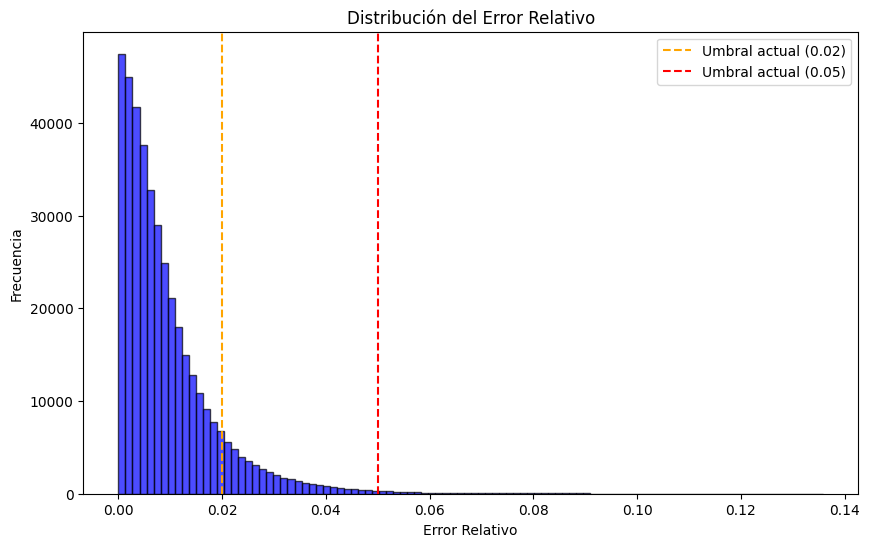

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular el error relativo
demanda_df['error_relativo'] = abs(demanda_df['demanda_programada'] / demanda_df['demanda_real'] - 1)

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(demanda_df['error_relativo'], bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(0.02, color='orange', linestyle='--', label='Umbral actual (0.02)')
plt.axvline(0.05, color='red', linestyle='--', label='Umbral actual (0.05)')
plt.title("Distribución del Error Relativo")
plt.xlabel("Error Relativo")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


# Modelo Bueno

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Preprocesamiento

# Dividir los datos en conjunto de entrenamiento y prueba
X = demanda_df.drop(columns=['anomalia', 'demanda_prevista', 'demanda_real', 'demanda_programada', 'error_relativo'])  # El resto de las variables
y = demanda_df['anomalia'].astype(int)  # La columna de anomalías
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un Bosque Aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print(conf_matrix)
# Evaluar el modelo
print("Clasificación en datos de prueba:")
print(classification_report(y_test, y_pred))


[[69722  1830    36]
 [ 5332  2933   140]
 [   93   239   262]]
Clasificación en datos de prueba:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     71588
           1       0.59      0.35      0.44      8405
           2       0.60      0.44      0.51       594

    accuracy                           0.90     80587
   macro avg       0.70      0.59      0.63     80587
weighted avg       0.89      0.90      0.89     80587



# Modelo de Bosque Aleatorio de regresión

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Separar las características y las variables objetivo ---
X = demanda_df.drop(columns=['demanda_programada', 'demanda_real', 'anomalia', 'demanda_prevista', 'error_relativo'])
y = demanda_df[['demanda_programada', 'demanda_real']]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Crear y entrenar el modelo Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 usa todos los núcleos disponibles
rf_model.fit(X_train_scaled, y_train)

# --- Predecir los valores ---
y_pred_rf = rf_model.predict(X_test_scaled)

# --- Evaluar el modelo ---
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R2 Score:", r2_rf)


Random Forest - Mean Absolute Error (MAE): 112.6045692921649
Random Forest - Mean Squared Error (MSE): 29420.392196313165
Random Forest - R2 Score: 0.9984519937090592


# ExtraTree

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Separar las características y las variables objetivo ---
X = demanda_df.drop(columns=['demanda_programada', 'demanda_real', 'anomalia', 'demanda_prevista', 'error_relativo'])
y = demanda_df[['demanda_programada', 'demanda_real']]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Crear y entrenar el modelo Extra Trees ---
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
et_model.fit(X_train_scaled, y_train)

# --- Predecir los valores ---
y_pred_et = et_model.predict(X_test_scaled)

# --- Evaluar el modelo ---
mae_et = mean_absolute_error(y_test, y_pred_et)
mse_et = mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print("Extra Trees - Mean Absolute Error (MAE):", mae_et)
print("Extra Trees - Mean Squared Error (MSE):", mse_et)
print("Extra Trees - R2 Score:", r2_et)


Extra Trees - Mean Absolute Error (MAE): 90.88383340365033
Extra Trees - Mean Squared Error (MSE): 20853.590879295993
Extra Trees - R2 Score: 0.9989020994590125


In [43]:
import pickle
# Guardar el modelo entrenado en un archivo usando pickle
model_filename = 'extra_trees_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(et_model, model_file)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Calcular anomalías reales
anomalias_reales = y_test.apply(
    lambda row: 1 if 0.02 < abs(row['demanda_programada'] / row['demanda_real'] - 1) <= 0.05
                else 2 if abs(row['demanda_programada'] / row['demanda_real'] - 1) > 0.05
                else 0,
    axis=1
)

# Calcular anomalías predichas
anomalias_predichas = [1 if 0.02 < abs(pred[0] / pred[1] - 1) <= 0.05
                       else 2 if abs(pred[0] / pred[1] - 1) > 0.05
                       else 0
                       for pred in y_pred_et]

# Convertir listas a numpy arrays para comparación
anomalias_reales = anomalias_reales.to_numpy()
anomalias_predichas = np.array(anomalias_predichas)

# Crear la matriz de confusión
matriz_confusion = confusion_matrix(anomalias_reales, anomalias_predichas)

# Generar reporte de clasificación
reporte_clasificacion = classification_report(anomalias_reales, anomalias_predichas, target_names=["No Anomalía", "Anomalía Leve", "Anomalía Grave"])

# --- 5. Comparar coincidencias ---
coincidencias = (anomalias_reales == anomalias_predichas).sum()
no_coincidencias = len(anomalias_reales) - coincidencias

# Resultados
print("Coincidencias:", coincidencias)
print("No coincidencias:", no_coincidencias)

# Porcentajes
print("Porcentaje de coincidencias:", (coincidencias / len(anomalias_reales)) * 100, "%")


# Mostrar resultados
print(matriz_confusion)
print(reporte_clasificacion)


Coincidencias: 74899
No coincidencias: 5688
Porcentaje de coincidencias: 92.94178961867298 %
[[70462  1200     0]
 [ 4119  4196    24]
 [   11   334   241]]
                precision    recall  f1-score   support

   No Anomalía       0.94      0.98      0.96     71662
 Anomalía Leve       0.73      0.50      0.60      8339
Anomalía Grave       0.91      0.41      0.57       586

      accuracy                           0.93     80587
     macro avg       0.86      0.63      0.71     80587
  weighted avg       0.92      0.93      0.92     80587



In [45]:
# Identificar índices donde las anomalías predichas son de tipo 1 y 2
indices_tipo_1 = np.where(anomalias_predichas == 1)[0]
indices_tipo_2 = np.where(anomalias_predichas == 2)[0]

# Seleccionar un registro para cada caso
registro_tipo_1_data = X_test.iloc[indices_tipo_1[0]] if len(indices_tipo_1) > 0 else None
registro_tipo_2_data = X_test.iloc[indices_tipo_2[0]] if len(indices_tipo_2) > 0 else None

registro_tipo_1_data, registro_tipo_2_data

(dia_semana                      2.000000
 es_festivo                      0.000000
 year                         2022.000000
 month                           2.000000
 day                             8.000000
 hour                           18.000000
 minute                         20.000000
 Temperatura máxima (ºC)        17.007593
 Temperatura mínima (ºC)         2.169490
 Temperatura media (ºC)          9.431580
 Racha (km/h)                   29.570072
 Velocidad máxima (km/h)        17.655429
 Precipitación 00-24h (mm)       0.100221
 Precipitación 00-06h (mm)       0.014306
 Precipitación 06-12h (mm)       0.020671
 Precipitación 12-18h (mm)       0.019895
 Precipitación 18-24h (mm)       0.011924
 Name: 149525, dtype: float64,
 dia_semana                      5.000000
 es_festivo                      0.000000
 year                         2019.000000
 month                           4.000000
 day                            26.000000
 hour                            6.000000
 mi

In [46]:
# Filtrar los registros del DataFrame para las anomalías de tipo 1 y 2
anomalia_1_df = demanda_df[demanda_df['anomalia'] == 1]
anomalia_2_df = demanda_df[demanda_df['anomalia'] == 2]

anomalia_1_df

,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute,...,Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),error_relativo
0,23082.0,22485.0,23128.0,2.0,1.0,2019.0,1.0,1.0,1.0,0.0,...,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.027802
1,23012.0,22485.0,23108.0,2.0,1.0,2019.0,1.0,1.0,1.0,10.0,...,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.026960
7,21810.0,20977.0,21824.0,2.0,1.0,2019.0,1.0,1.0,2.0,10.0,...,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.038810
8,21553.0,20977.0,21550.0,2.0,1.0,2019.0,1.0,1.0,2.0,20.0,...,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.026589
12,20685.0,19754.0,20666.0,2.0,1.0,2019.0,1.0,1.0,3.0,0.0,...,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.044130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403061,27711.0,26592.0,27443.0,4.0,0.0,2024.0,10.0,31.0,22.0,0.0,...,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.031010
403062,27404.0,26592.0,27172.0,4.0,0.0,2024.0,10.0,31.0,22.0,5.0,...,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.021346
403073,25230.0,24393.0,24986.0,4.0,0.0,2024.0,10.0,31.0,23.0,0.0,...,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.023733
403074,25019.0,24393.0,24938.0,4.0,0.0,2024.0,10.0,31.0,23.0,5.0,...,10.898935,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.021854


In [47]:
demanda_df.dtypes

demanda_prevista             float64
demanda_programada           float64
demanda_real                 float64
dia_semana                   float64
es_festivo                   float64
year                         float64
month                        float64
day                          float64
hour                         float64
minute                       float64
anomalia                     float64
Temperatura máxima (ºC)      float64
Temperatura mínima (ºC)      float64
Temperatura media (ºC)       float64
Racha (km/h)                 float64
Velocidad máxima (km/h)      float64
Precipitación 00-24h (mm)    float64
Precipitación 00-06h (mm)    float64
Precipitación 06-12h (mm)    float64
Precipitación 12-18h (mm)    float64
Precipitación 18-24h (mm)    float64
error_relativo               float64
dtype: object

In [48]:
demanda_df['dia_semana'].value_counts()

dia_semana
1.0    57894
2.0    57745
3.0    57745
4.0    57613
7.0    57457
6.0    57306
5.0    57175
Name: count, dtype: int64

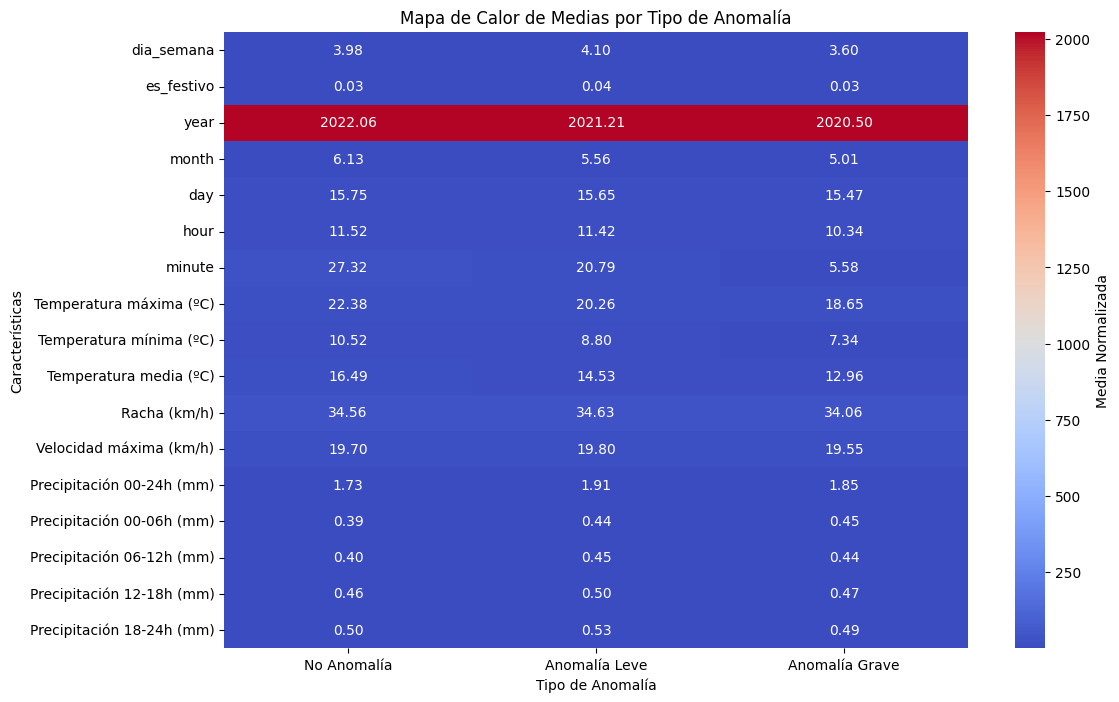

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular anomalías reales
demanda_df['anomalia'] = demanda_df.apply(
    lambda row: 1 if 0.02 < abs(row['demanda_programada'] / row['demanda_real'] - 1) <= 0.05
                else 2 if abs(row['demanda_programada'] / row['demanda_real'] - 1) > 0.05
                else 0,
    axis=1
)

# Filtrar características excluyendo demandas y error relativo
filtered_df = demanda_df.drop(columns=['demanda_programada', 'demanda_real', 'demanda_prevista', 'error_relativo'])

# Calcular las medias agrupadas por tipo de anomalía
medias = filtered_df.groupby('anomalia').mean()

# Crear mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(medias.T, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Media Normalizada'})
plt.title("Mapa de Calor de Medias por Tipo de Anomalía")
plt.xlabel("Tipo de Anomalía")
plt.ylabel("Características")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["No Anomalía", "Anomalía Leve", "Anomalía Grave"], rotation=0)
plt.show()


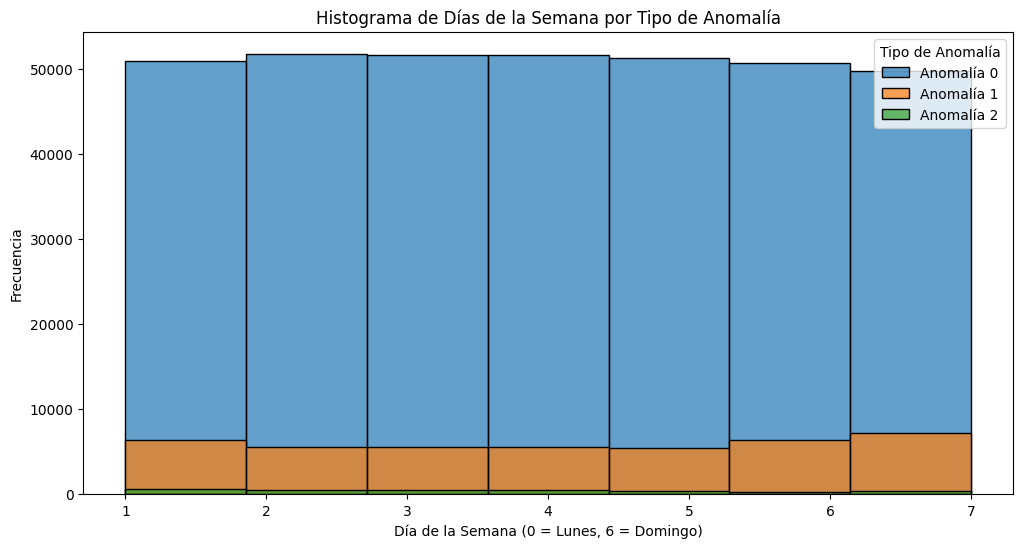

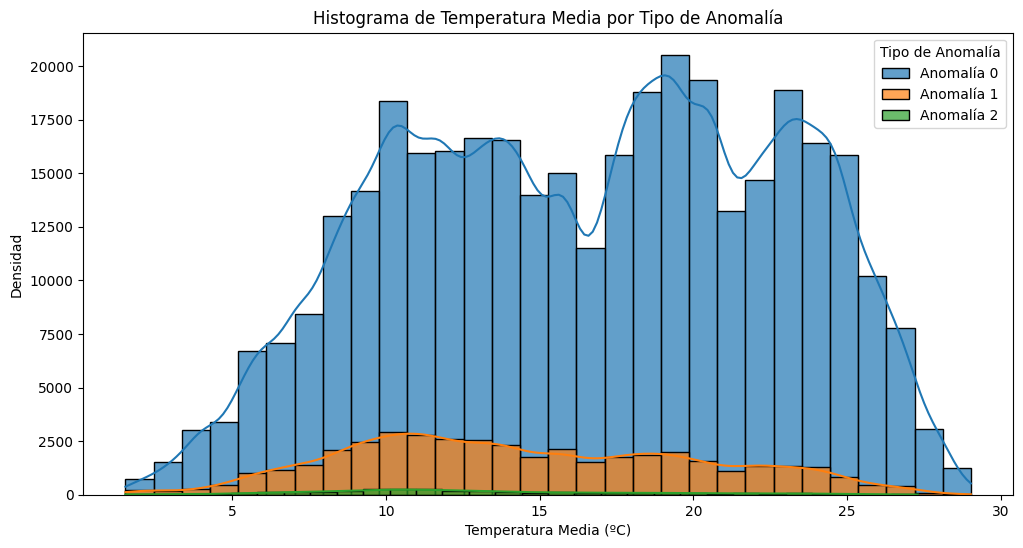

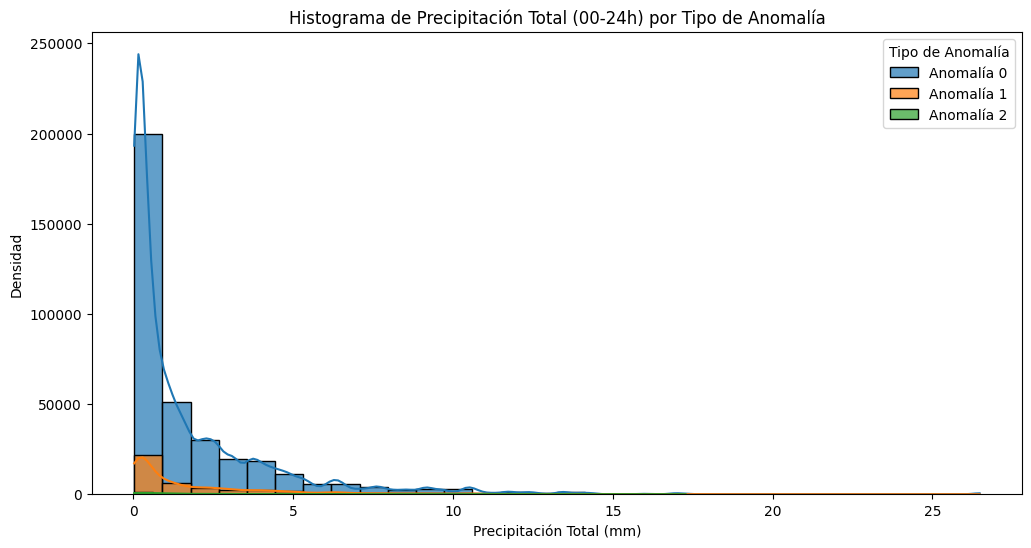

In [50]:
# Histograma de días de la semana por tipo de anomalía
plt.figure(figsize=(12, 6))
for anomalia in [0, 1, 2]:
    sns.histplot(filtered_df[filtered_df['anomalia'] == anomalia]['dia_semana'], kde=False, bins=7, label=f"Anomalía {anomalia}", alpha=0.7)

plt.title("Histograma de Días de la Semana por Tipo de Anomalía")
plt.xlabel("Día de la Semana (0 = Lunes, 6 = Domingo)")
plt.ylabel("Frecuencia")
plt.legend(title="Tipo de Anomalía")
plt.show()

# Histograma de temperatura media por tipo de anomalía
plt.figure(figsize=(12, 6))
for anomalia in [0, 1, 2]:
    sns.histplot(filtered_df[filtered_df['anomalia'] == anomalia]['Temperatura media (ºC)'], kde=True, bins=30, label=f"Anomalía {anomalia}", alpha=0.7)

plt.title("Histograma de Temperatura Media por Tipo de Anomalía")
plt.xlabel("Temperatura Media (ºC)")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Anomalía")
plt.show()

# Histograma de precipitaciones totales (00-24h) por tipo de anomalía
plt.figure(figsize=(12, 6))
for anomalia in [0, 1, 2]:
    sns.histplot(filtered_df[filtered_df['anomalia'] == anomalia]['Precipitación 00-24h (mm)'], kde=True, bins=30, label=f"Anomalía {anomalia}", alpha=0.7)

plt.title("Histograma de Precipitación Total (00-24h) por Tipo de Anomalía")
plt.xlabel("Precipitación Total (mm)")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Anomalía")
plt.show()


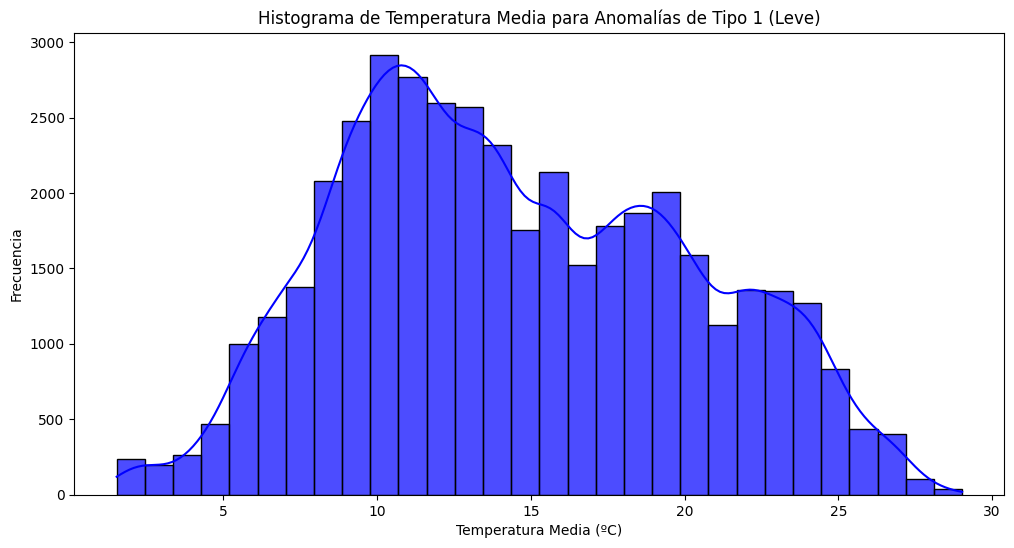

In [51]:
# Filtrar datos para anomalías de tipo 1 (Anomalía Leve)
anomalia_1 = filtered_df[filtered_df['anomalia'] == 1]

# Histograma de Temperatura Media para Anomalías de Tipo 1
plt.figure(figsize=(12, 6))
sns.histplot(anomalia_1['Temperatura media (ºC)'], kde=True, bins=30, color='blue', alpha=0.7)

plt.title("Histograma de Temperatura Media para Anomalías de Tipo 1 (Leve)")
plt.xlabel("Temperatura Media (ºC)")
plt.ylabel("Frecuencia")
plt.show()


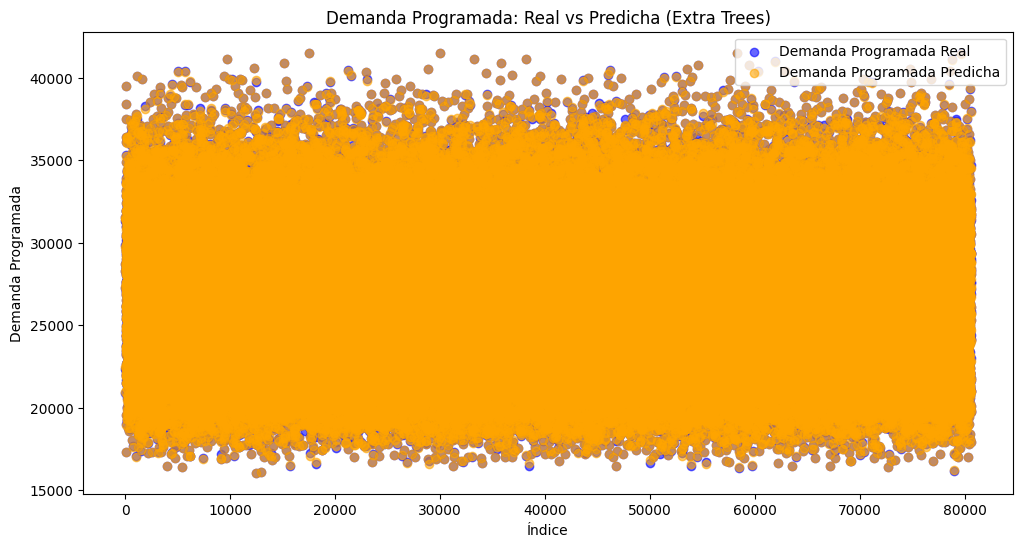

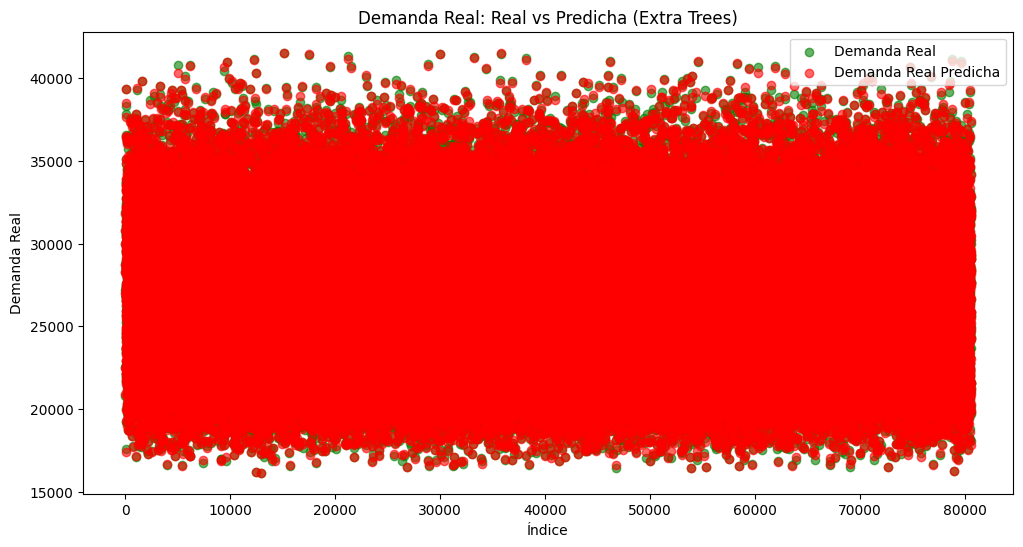

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# --- Generar los gráficos ---
# Convertir y_test a numpy para facilitar el manejo
y_test_np = y_test.to_numpy()

# Comparar "Demanda Programada"
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_np)), y_test_np[:, 0], label='Demanda Programada Real', alpha=0.6, color='blue')
plt.scatter(range(len(y_pred_et[:, 0])), y_pred_et[:, 0], label='Demanda Programada Predicha', alpha=0.6, color='orange')
plt.legend()
plt.title("Demanda Programada: Real vs Predicha (Extra Trees)")
plt.xlabel("Índice")
plt.ylabel("Demanda Programada")
plt.show()

# Comparar "Demanda Real"
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_np)), y_test_np[:, 1], label='Demanda Real', alpha=0.6, color='green')
plt.scatter(range(len(y_pred_et[:, 1])), y_pred_et[:, 1], label='Demanda Real Predicha', alpha=0.6, color='red')
plt.legend()
plt.title("Demanda Real: Real vs Predicha (Extra Trees)")
plt.xlabel("Índice")
plt.ylabel("Demanda Real")
plt.show()




ERRORES

Predicciones reales vs predichas

CLASE 2--> 0,7%
CLASE 1--> 10%
CLASE 0--> 89%

In [53]:
# Crear la columna 'fecha' combinando año, mes y día
demanda_df['fecha'] = pd.to_datetime(demanda_df[['year', 'month', 'day']])

# Mostrar el DataFrame actualizado
demanda_df


,demanda_prevista,demanda_programada,demanda_real,dia_semana,es_festivo,year,month,day,hour,minute,...,Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),error_relativo,fecha
0,23082.0,22485.0,23128.0,2.0,1.0,2019.0,1.0,1.0,1.0,0.0,...,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.027802,2019-01-01
1,23012.0,22485.0,23108.0,2.0,1.0,2019.0,1.0,1.0,1.0,10.0,...,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.026960,2019-01-01
2,22903.0,22485.0,22889.0,2.0,1.0,2019.0,1.0,1.0,1.0,20.0,...,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.017650,2019-01-01
3,22757.0,22485.0,22705.0,2.0,1.0,2019.0,1.0,1.0,1.0,30.0,...,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.009689,2019-01-01
4,22571.0,22485.0,22548.0,2.0,1.0,2019.0,1.0,1.0,1.0,40.0,...,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,0.002794,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403080,24094.0,24128.0,23968.0,4.0,0.0,2024.0,10.0,31.0,23.0,35.0,...,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.006676,2024-10-31
403081,23974.0,24128.0,23806.0,4.0,0.0,2024.0,10.0,31.0,23.0,40.0,...,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.013526,2024-10-31
403082,23876.0,22991.0,23650.0,4.0,0.0,2024.0,10.0,31.0,23.0,45.0,...,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.027865,2024-10-31
403083,23761.0,22991.0,23238.0,4.0,0.0,2024.0,10.0,31.0,23.0,50.0,...,15.001067,30.168854,17.268801,4.786985,1.130245,1.772250,1.262611,0.642756,0.010629,2024-10-31


INSERCIÓN DATOS CLIMA

In [54]:
df_clima = pd.read_csv('clima.csv')
df_clima = df_clima.drop(columns = ['Unnamed: 0', 'Mes', 'Año'])
df_clima.rename(columns={'Fecha': 'fecha'}, inplace=True)
df_clima


,fecha,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm)
0,2019-01-01,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
1,2019-01-02,13.028778,0.593069,6.588255,28.013573,16.648334,0.111625,0.025726,0.033856,0.024686,0.020263
2,2019-01-03,12.246521,-0.295720,5.742093,25.315421,15.187679,0.115626,0.022016,0.030059,0.025791,0.019876
3,2019-01-04,12.620245,-0.596882,5.787425,23.526432,14.362071,0.104790,0.019191,0.023657,0.020901,0.022106
4,2019-01-05,13.929807,-0.994761,6.247248,24.282297,14.704452,0.104390,0.022745,0.025022,0.022020,0.023257
...,...,...,...,...,...,...,...,...,...,...,...
2120,2024-10-27,13.957291,6.845223,10.437288,28.202425,16.024681,5.199997,1.432433,0.937692,1.527875,1.306471
2121,2024-10-28,17.024784,8.241783,12.667429,33.356118,19.038257,3.908336,1.560863,0.898117,0.486381,0.982577
2122,2024-10-29,18.221729,10.158960,14.229209,40.470003,22.700228,11.770237,2.783947,2.923808,3.420771,3.234037
2123,2024-10-30,17.932677,10.500654,14.254172,36.996783,21.068379,9.146802,3.249993,2.328000,2.339267,1.227109


In [55]:
nulos = demanda_df.isnull().sum()

# Mostrar el conteo de nulos
nulos


demanda_prevista             0
demanda_programada           0
demanda_real                 0
dia_semana                   0
es_festivo                   0
year                         0
month                        0
day                          0
hour                         0
minute                       0
anomalia                     0
Temperatura máxima (ºC)      0
Temperatura mínima (ºC)      0
Temperatura media (ºC)       0
Racha (km/h)                 0
Velocidad máxima (km/h)      0
Precipitación 00-24h (mm)    0
Precipitación 00-06h (mm)    0
Precipitación 06-12h (mm)    0
Precipitación 12-18h (mm)    0
Precipitación 18-24h (mm)    0
error_relativo               0
fecha                        0
dtype: int64

In [56]:
df_clima

,fecha,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm)
0,2019-01-01,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704
1,2019-01-02,13.028778,0.593069,6.588255,28.013573,16.648334,0.111625,0.025726,0.033856,0.024686,0.020263
2,2019-01-03,12.246521,-0.295720,5.742093,25.315421,15.187679,0.115626,0.022016,0.030059,0.025791,0.019876
3,2019-01-04,12.620245,-0.596882,5.787425,23.526432,14.362071,0.104790,0.019191,0.023657,0.020901,0.022106
4,2019-01-05,13.929807,-0.994761,6.247248,24.282297,14.704452,0.104390,0.022745,0.025022,0.022020,0.023257
...,...,...,...,...,...,...,...,...,...,...,...
2120,2024-10-27,13.957291,6.845223,10.437288,28.202425,16.024681,5.199997,1.432433,0.937692,1.527875,1.306471
2121,2024-10-28,17.024784,8.241783,12.667429,33.356118,19.038257,3.908336,1.560863,0.898117,0.486381,0.982577
2122,2024-10-29,18.221729,10.158960,14.229209,40.470003,22.700228,11.770237,2.783947,2.923808,3.420771,3.234037
2123,2024-10-30,17.932677,10.500654,14.254172,36.996783,21.068379,9.146802,3.249993,2.328000,2.339267,1.227109


In [57]:
import os
import pandas as pd

# Lista de rangos de archivos a procesar
ranges = [
    (1, 7),   # clima_1.csv a clima_6.csv
    (7, 11),  # clima_7_1.csv a clima_7_10.csv
    (8, 16)   # clima_8.csv a clima_15.csv
]

# Carpeta donde están almacenados los archivos CSV
carpeta = "datosEsios/"

# Lista para almacenar los DataFrames
dataframes = []

# Itera sobre los rangos definidos
for start, end in ranges:
    # Determinar el inicio del rango
    if start == 7:
        comienzo = 1  # Ajuste especial para clima_7_X.csv
    else:
        comienzo = start
    
    # Iterar sobre cada índice en el rango
    for i in range(comienzo, end):
        if start == 7 and i <= 10:  # Para clima_7_1 hasta clima_7_10
            archivo = f'clima_7_{i}.csv'
        else:  # Para otros archivos
            archivo = f'clima_{i}.csv'
        
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(carpeta, archivo)
        
        # Leer el archivo si existe
        if os.path.exists(ruta_completa):
            try:
                # Leer el archivo CSV
                df = pd.read_csv(ruta_completa)
                dataframes.append(df)  # Agregar el DataFrame a la lista
                print(f"Archivo procesado: {archivo}")
            except Exception as e:
                print(f"Error al leer {archivo}: {e}")
        else:
            print(f"Archivo no encontrado: {archivo}")

# Combinar todos los DataFrames en uno solo si hay archivos válidos
if dataframes:
    df_clima = pd.concat(dataframes, ignore_index=True)
    print("Archivos combinados exitosamente en un DataFrame único.")
else:
    print("No se encontraron archivos para combinar.")

# Mostrar las primeras filas del DataFrame combinado
df_clima


Archivo procesado: clima_1.csv
Archivo procesado: clima_2.csv
Archivo procesado: clima_3.csv
Archivo procesado: clima_4.csv
Archivo procesado: clima_5.csv
Archivo procesado: clima_6.csv
Archivo procesado: clima_7_1.csv
Archivo procesado: clima_7_2.csv
Archivo procesado: clima_7_3.csv
Archivo procesado: clima_7_4.csv
Archivo procesado: clima_7_5.csv
Archivo procesado: clima_7_6.csv
Archivo procesado: clima_7_7.csv
Archivo procesado: clima_7_8.csv
Archivo procesado: clima_7_9.csv
Archivo procesado: clima_7_10.csv
Archivo procesado: clima_8.csv
Archivo procesado: clima_9.csv
Archivo procesado: clima_10.csv
Archivo procesado: clima_11.csv
Archivo procesado: clima_12.csv
Archivo procesado: clima_13.csv
Archivo procesado: clima_14.csv
Archivo procesado: clima_15.csv
Archivos combinados exitosamente en un DataFrame único.


,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha,Mes,Año
0,Estaca de Bares,A Coruña,19.5,14.2,16.8,95.000000,69.000000,0.4,0.0,0.2,0.2,0.0,2013-05-07,5,2013
1,As Pontes,A Coruña,17.8,12.9,15.3,40.964808,25.575192,16.8,10.8,3.0,3.0,0.0,2013-05-07,5,2013
2,A Coruña,A Coruña,19.7,15.0,17.4,66.000000,31.000000,1.2,1.0,0.0,0.2,0.0,2013-05-07,5,2013
3,A Coruña Aeropuerto,A Coruña,19.2,14.8,17.0,68.000000,39.000000,0.1,0.0,0.0,0.1,0.0,2013-05-07,5,2013
4,"Carballo, Depuradora",A Coruña,18.2,13.2,15.7,40.964808,25.575192,3.6,1.8,1.2,0.6,0.0,2013-05-07,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099132,"San Bartolome Tirajana, El Matorral",Las Palmas,25.2,15.2,20.2,25.000000,14.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024
5099133,Agüimes,Las Palmas,23.4,14.4,18.9,23.000000,15.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024
5099134,"Telde, Centro Forestal Doramas",Las Palmas,22.2,13.4,17.8,25.000000,15.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024
5099135,Gran Canaria Aeropuerto,Las Palmas,24.5,17.6,21.1,24.000000,14.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024


# Tratamiento Datos Clima

In [58]:
# Crear una máscara lógica para los años que deseas eliminar
df_clima = df_clima[df_clima['Año']>2018]
df_clima

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha,Mes,Año
1607425,Estaca de Bares,A Coruña,11.0,8.7,9.8,61.000000,39.000000,0.0,0.0,0.0,0.0,0.0,2019-01-01,1,2019
1607426,As Pontes,A Coruña,13.9,-0.8,6.5,46.109954,27.791006,0.0,0.0,0.0,0.0,0.0,2019-01-01,1,2019
1607427,A Coruña,A Coruña,13.9,5.1,9.5,15.000000,10.000000,0.0,0.0,0.0,0.0,0.0,2019-01-01,1,2019
1607428,A Coruña Aeropuerto,A Coruña,14.2,0.0,7.1,24.000000,15.000000,0.0,0.0,0.0,0.0,0.0,2019-01-01,1,2019
1607429,"Carballo, Depuradora",A Coruña,16.0,-2.8,6.6,46.109954,27.791006,0.0,0.0,0.0,0.0,0.0,2019-01-01,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099132,"San Bartolome Tirajana, El Matorral",Las Palmas,25.2,15.2,20.2,25.000000,14.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024
5099133,Agüimes,Las Palmas,23.4,14.4,18.9,23.000000,15.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024
5099134,"Telde, Centro Forestal Doramas",Las Palmas,22.2,13.4,17.8,25.000000,15.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024
5099135,Gran Canaria Aeropuerto,Las Palmas,24.5,17.6,21.1,24.000000,14.000000,0.0,0.0,0.0,0.0,0.0,2024-10-31,10,2024


In [59]:
df_clima['Provincia'].value_counts()
df_clima = df_clima[~df_clima['Provincia'].isin(['Illes Balears', 'Las Palmas', 'Santa Cruz de Tenerife', 'Ceuta', 'Melilla'])]
df_clima 

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha,Mes,Año
1607425,Estaca de Bares,A Coruña,11.0,8.7,9.8,61.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607426,As Pontes,A Coruña,13.9,-0.8,6.5,46.109954,27.791006,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607427,A Coruña,A Coruña,13.9,5.1,9.5,15.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607428,A Coruña Aeropuerto,A Coruña,14.2,0.0,7.1,24.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607429,"Carballo, Depuradora",A Coruña,16.0,-2.8,6.6,46.109954,27.791006,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099034,Cap de Vaquèira,Lleida,6.1,4.0,5.0,50.000000,36.000000,2.142696,0.480355,0.318835,0.455971,0.868009,2024-10-31,10,2024
5099035,"Naut Aran, Arties",Lleida,18.5,7.3,12.9,24.000000,6.000000,0.300000,0.300000,0.000000,0.000000,0.000000,2024-10-31,10,2024
5099036,Bossòst,Lleida,19.8,7.4,13.6,26.000000,17.000000,2.142696,0.480355,0.318835,0.455971,0.868009,2024-10-31,10,2024
5099037,Valcarlos/Luzaide,Navarra,22.1,10.3,16.2,26.000000,17.000000,1.600000,0.000000,0.000000,1.600000,0.000000,2024-10-31,10,2024


In [60]:
df_clima.drop(columns = ['Estación', 'Provincia'], inplace = True)
df_clima

/var/folders/7h/skmw603n3gq1ygxfkgd7tytw0000gn/T/ipykernel_10047/2385389955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima.drop(columns = ['Estación', 'Provincia'], inplace = True)


,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha,Mes,Año
1607425,11.0,8.7,9.8,61.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607426,13.9,-0.8,6.5,46.109954,27.791006,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607427,13.9,5.1,9.5,15.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607428,14.2,0.0,7.1,24.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
1607429,16.0,-2.8,6.6,46.109954,27.791006,0.000000,0.000000,0.000000,0.000000,0.000000,2019-01-01,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099034,6.1,4.0,5.0,50.000000,36.000000,2.142696,0.480355,0.318835,0.455971,0.868009,2024-10-31,10,2024
5099035,18.5,7.3,12.9,24.000000,6.000000,0.300000,0.300000,0.000000,0.000000,0.000000,2024-10-31,10,2024
5099036,19.8,7.4,13.6,26.000000,17.000000,2.142696,0.480355,0.318835,0.455971,0.868009,2024-10-31,10,2024
5099037,22.1,10.3,16.2,26.000000,17.000000,1.600000,0.000000,0.000000,1.600000,0.000000,2024-10-31,10,2024


In [61]:
df_clima = df_clima.groupby('Fecha', as_index=False).mean()
df_clima

,Fecha,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Mes,Año
0,2019-01-01,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,1.0,2019.0
1,2019-01-02,13.028778,0.593069,6.588255,28.013573,16.648334,0.111625,0.025726,0.033856,0.024686,0.020263,1.0,2019.0
2,2019-01-03,12.246521,-0.295720,5.742093,25.315421,15.187679,0.115626,0.022016,0.030059,0.025791,0.019876,1.0,2019.0
3,2019-01-04,12.620245,-0.596882,5.787425,23.526432,14.362071,0.104790,0.019191,0.023657,0.020901,0.022106,1.0,2019.0
4,2019-01-05,13.929807,-0.994761,6.247248,24.282297,14.704452,0.104390,0.022745,0.025022,0.022020,0.023257,1.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,2024-10-27,13.957291,6.845223,10.437288,28.202425,16.024681,5.199997,1.432433,0.937692,1.527875,1.306471,10.0,2024.0
2121,2024-10-28,17.024784,8.241783,12.667429,33.356118,19.038257,3.908336,1.560863,0.898117,0.486381,0.982577,10.0,2024.0
2122,2024-10-29,18.221729,10.158960,14.229209,40.470003,22.700228,11.770237,2.783947,2.923808,3.420771,3.234037,10.0,2024.0
2123,2024-10-30,17.932677,10.500654,14.254172,36.996783,21.068379,9.146802,3.249993,2.328000,2.339267,1.227109,10.0,2024.0


In [62]:
df_clima['Mes'] = df_clima['Mes'].astype(int)
df_clima['Año'] = df_clima['Mes'].astype(int)
df_clima

,Fecha,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Mes,Año
0,2019-01-01,14.767538,0.951503,7.623368,21.723435,13.344846,0.104772,0.022131,0.026764,0.024221,0.025704,1,1
1,2019-01-02,13.028778,0.593069,6.588255,28.013573,16.648334,0.111625,0.025726,0.033856,0.024686,0.020263,1,1
2,2019-01-03,12.246521,-0.295720,5.742093,25.315421,15.187679,0.115626,0.022016,0.030059,0.025791,0.019876,1,1
3,2019-01-04,12.620245,-0.596882,5.787425,23.526432,14.362071,0.104790,0.019191,0.023657,0.020901,0.022106,1,1
4,2019-01-05,13.929807,-0.994761,6.247248,24.282297,14.704452,0.104390,0.022745,0.025022,0.022020,0.023257,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,2024-10-27,13.957291,6.845223,10.437288,28.202425,16.024681,5.199997,1.432433,0.937692,1.527875,1.306471,10,10
2121,2024-10-28,17.024784,8.241783,12.667429,33.356118,19.038257,3.908336,1.560863,0.898117,0.486381,0.982577,10,10
2122,2024-10-29,18.221729,10.158960,14.229209,40.470003,22.700228,11.770237,2.783947,2.923808,3.420771,3.234037,10,10
2123,2024-10-30,17.932677,10.500654,14.254172,36.996783,21.068379,9.146802,3.249993,2.328000,2.339267,1.227109,10,10


In [63]:
df_clima.to_csv('clima.csv')

# Gráficos EDA


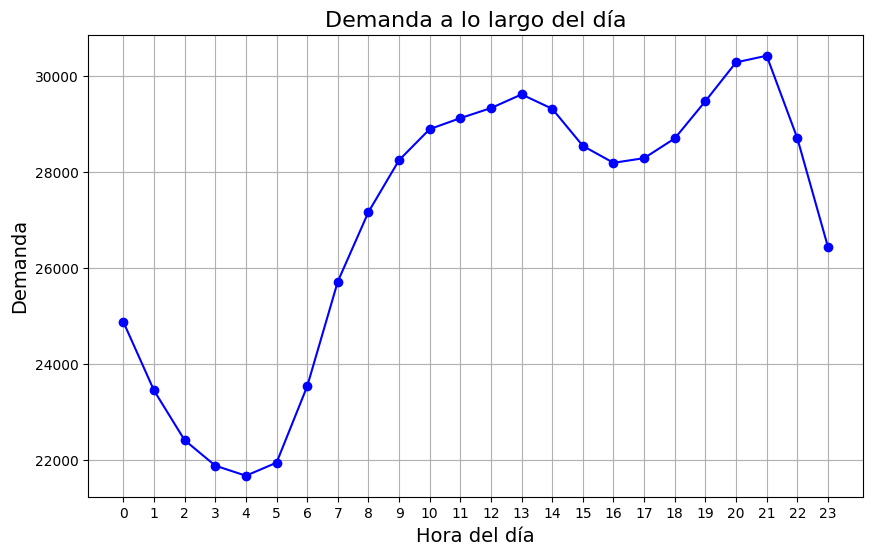

In [64]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'datetime' está en formato datetime y que no tenga zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Agrupar los datos por hora y calcular la media de demanda para cada hora
demanda_por_hora = demanda_real_peninsula_2019_2024.groupby(demanda_real_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(demanda_por_hora.index, demanda_por_hora.values, marker='o', linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Demanda a lo largo del día', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Demanda', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)
plt.grid(True)

# Mostrar el gráfico
plt.show()


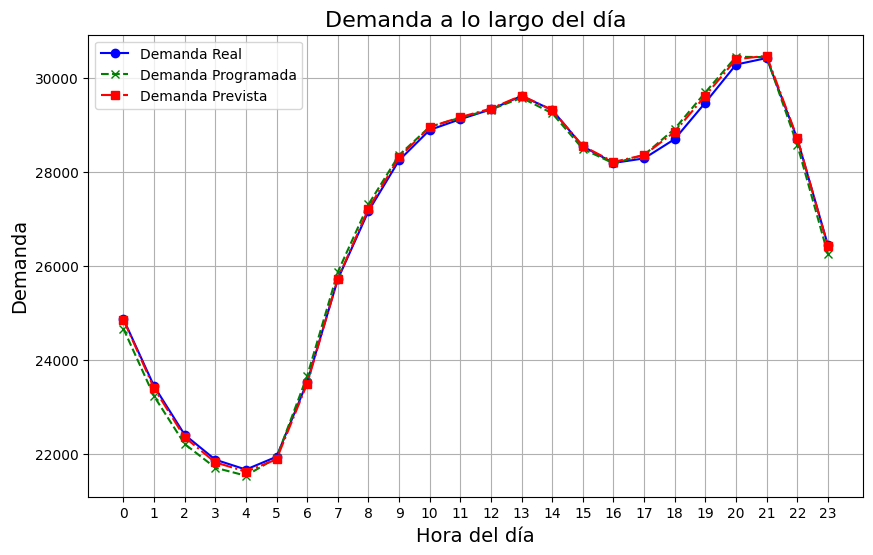

In [65]:
import matplotlib.pyplot as plt

# Asegúrate de que las columnas 'datetime' están en formato datetime y que no tengan zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

demanda_programada_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_programada_peninsula_2019_2024['datetime'], utc=True)
demanda_programada_peninsula_2019_2024['datetime'] = demanda_programada_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

demanda_prevista_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_prevista_peninsula_2019_2024['datetime'], utc=True)
demanda_prevista_peninsula_2019_2024['datetime'] = demanda_prevista_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Agrupar los datos por hora y calcular la media de demanda para cada hora
demanda_real_por_hora = demanda_real_peninsula_2019_2024.groupby(demanda_real_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()
demanda_programada_por_hora = demanda_programada_peninsula_2019_2024.groupby(demanda_programada_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()
demanda_prevista_por_hora = demanda_prevista_peninsula_2019_2024.groupby(demanda_prevista_peninsula_2019_2024['datetime'].dt.hour)['value'].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Añadir las tres líneas al gráfico
plt.plot(demanda_real_por_hora.index, demanda_real_por_hora.values, marker='o', linestyle='-', color='b', label='Demanda Real')
plt.plot(demanda_programada_por_hora.index, demanda_programada_por_hora.values, marker='x', linestyle='--', color='g', label='Demanda Programada')
plt.plot(demanda_prevista_por_hora.index, demanda_prevista_por_hora.values, marker='s', linestyle='-.', color='r', label='Demanda Prevista')

# Añadir títulos, etiquetas y leyenda
plt.title('Demanda a lo largo del día', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Demanda', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


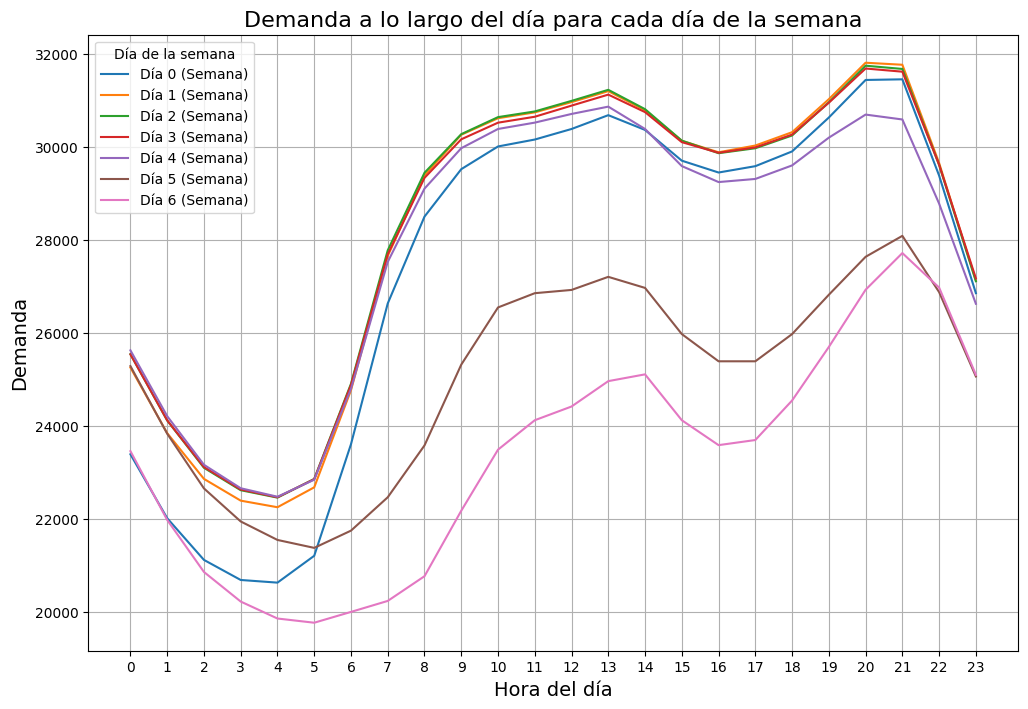

In [66]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'datetime' está en formato datetime y que no tenga zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Añadir una columna con el día de la semana (lunes=0, domingo=6)
demanda_real_peninsula_2019_2024['dia_semana'] = demanda_real_peninsula_2019_2024['datetime'].dt.dayofweek

# Agrupar los datos por día de la semana y hora, y calcular la media de demanda para cada combinación
demanda_por_dia_hora = demanda_real_peninsula_2019_2024.groupby(['dia_semana', demanda_real_peninsula_2019_2024['datetime'].dt.hour])['value'].mean().unstack(fill_value=0)

# Crear los gráficos
plt.figure(figsize=(12, 8))

# Graficar la demanda a lo largo de las horas para cada día de la semana
for dia in range(7):
    plt.plot(demanda_por_dia_hora.columns, demanda_por_dia_hora.loc[dia], label=f'Día {dia} (Semana)')

# Añadir títulos y etiquetas
plt.title('Demanda a lo largo del día para cada día de la semana', fontsize=16)
plt.xlabel('Hora del día', fontsize=14)
plt.ylabel('Demanda', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)
plt.grid(True)
plt.legend(title='Día de la semana')

# Mostrar el gráfico
plt.show()


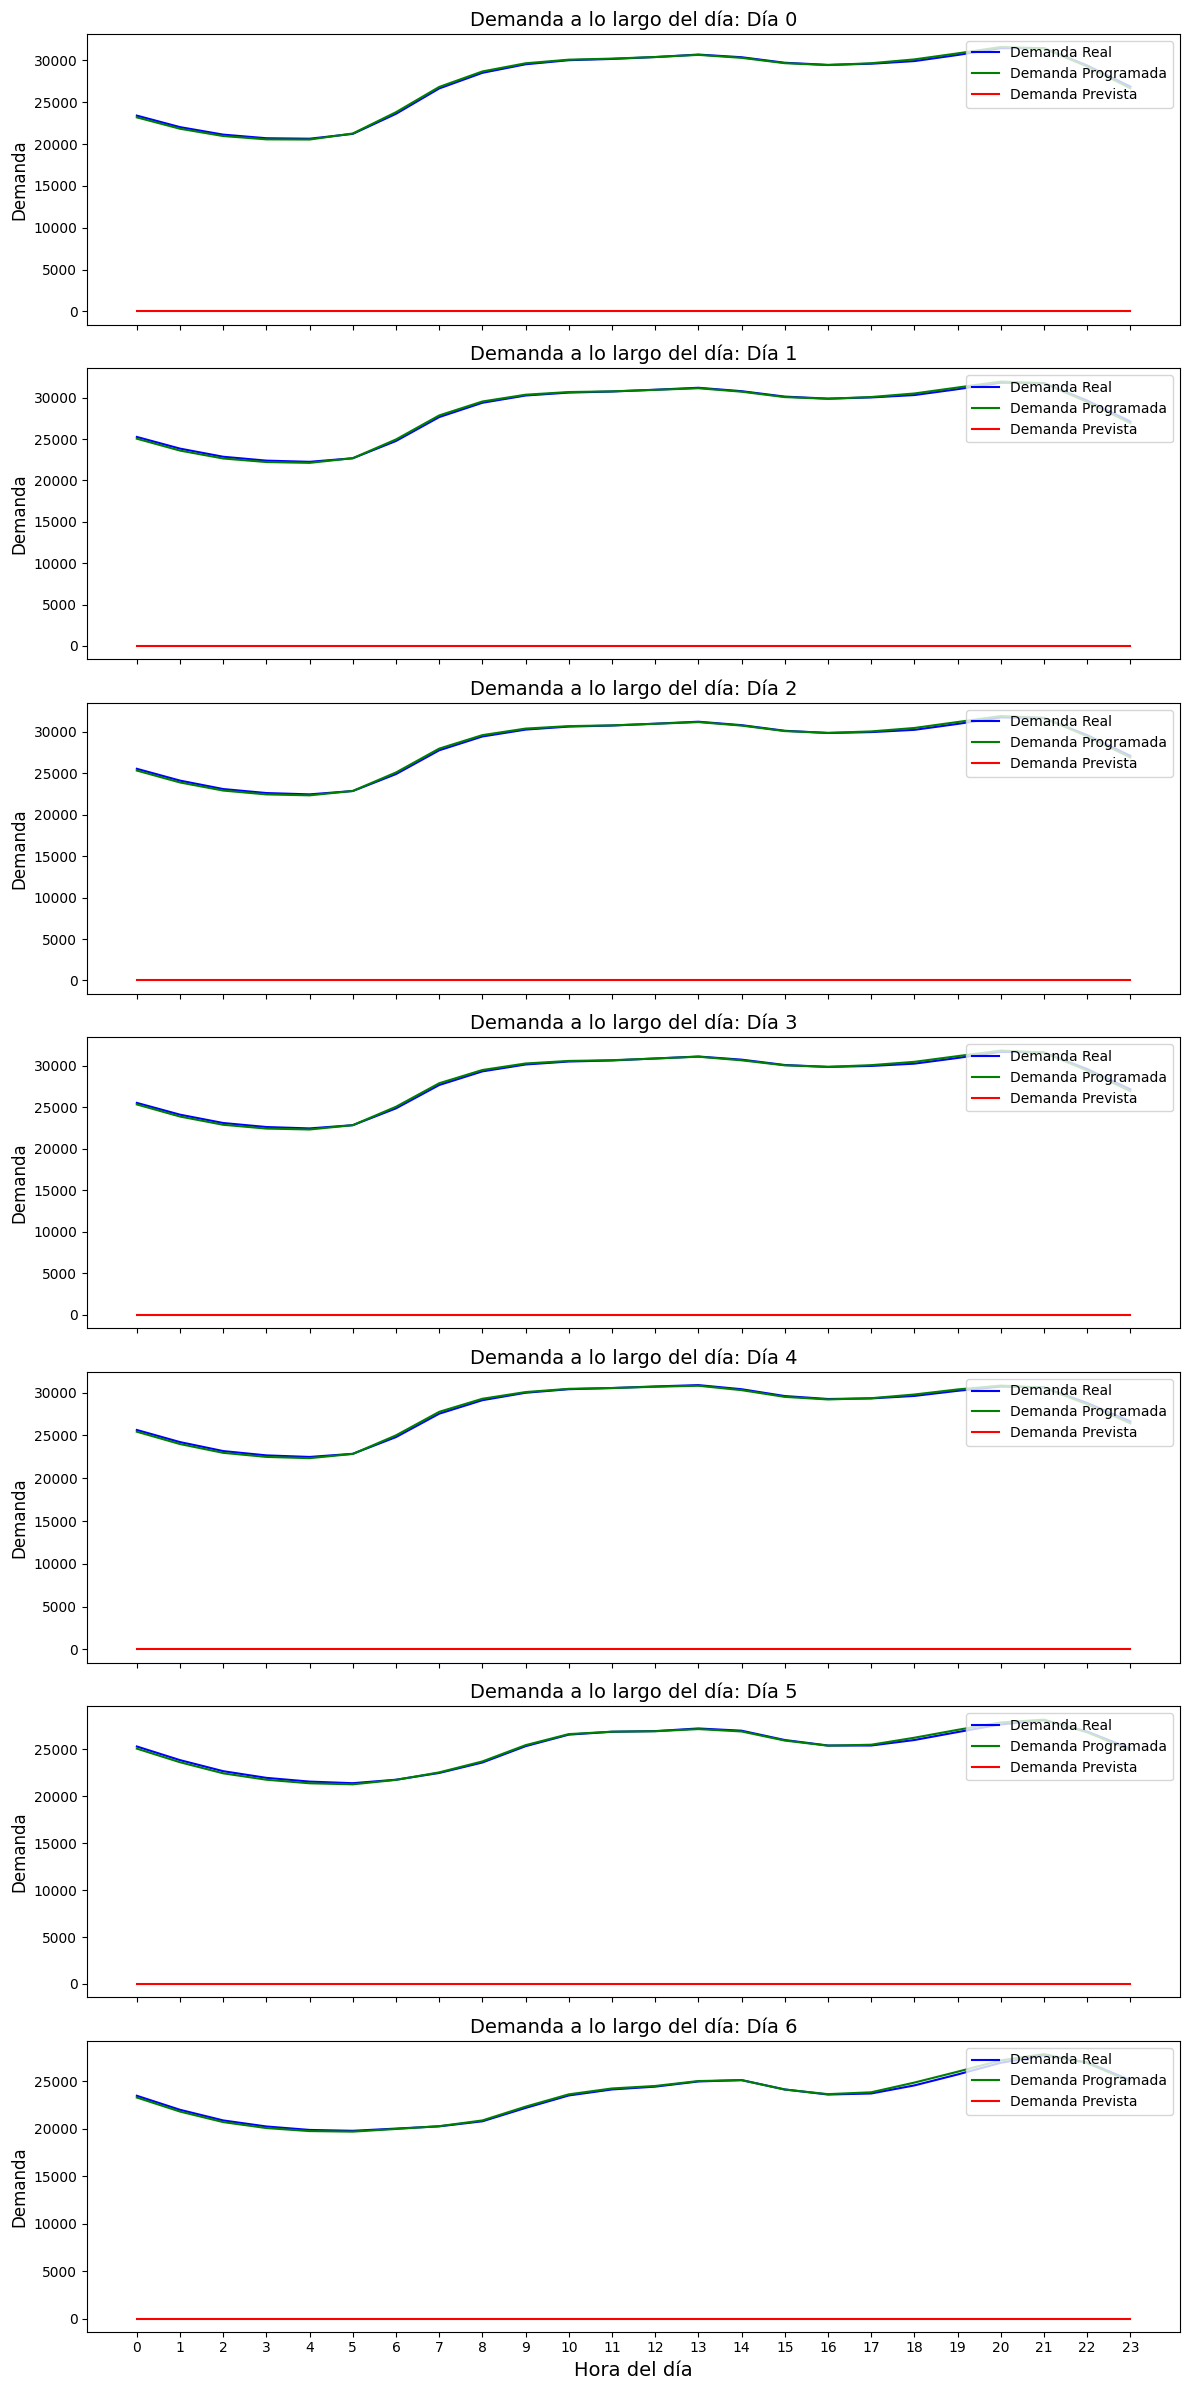

In [67]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'datetime' está en formato datetime y que no tenga zonas horarias
demanda_real_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_real_peninsula_2019_2024['datetime'], utc=True)
demanda_real_peninsula_2019_2024['datetime'] = demanda_real_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Añadir una columna con el día de la semana (lunes=0, domingo=6)
demanda_real_peninsula_2019_2024['dia_semana'] = demanda_real_peninsula_2019_2024['datetime'].dt.dayofweek
demanda_programada_peninsula_2019_2024['datetime'] = pd.to_datetime(demanda_programada_peninsula_2019_2024['datetime'], utc=True)
demanda_programada_peninsula_2019_2024['datetime'] = demanda_programada_peninsula_2019_2024['datetime'].dt.tz_convert('Europe/Madrid')

# Añadir la columna 'dia_semana' en demanda programada
demanda_programada_peninsula_2019_2024['dia_semana'] = demanda_programada_peninsula_2019_2024['datetime'].dt.dayofweek

# Agrupar los datos por día de la semana y hora, y calcular la media de demanda para cada combinación
demanda_real_por_dia_hora = demanda_real_peninsula_2019_2024.groupby(['dia_semana', demanda_real_peninsula_2019_2024['datetime'].dt.hour])['value'].mean().unstack(fill_value=0)
demanda_programada_por_dia_hora = demanda_programada_peninsula_2019_2024.groupby(['dia_semana', demanda_programada_peninsula_2019_2024['datetime'].dt.hour])['value'].mean().unstack(fill_value=0)
demanda_prevista_por_dia_hora = demanda_prevista_peninsula_2019_2024.groupby(['dia_semana', demanda_prevista_peninsula_2019_2024['datetime'].dt.hour])['value'].mean().unstack(fill_value=0)

# Reindexar todos los DataFrames para que tengan los mismos índices y columnas
demanda_real_por_dia_hora = demanda_real_por_dia_hora.reindex(range(7), fill_value=0)
demanda_programada_por_dia_hora = demanda_programada_por_dia_hora.reindex(range(7), fill_value=0)
demanda_prevista_por_dia_hora = demanda_prevista_por_dia_hora.reindex(range(7), fill_value=0)

# Crear la figura con 7 subgráficos (uno para cada día de la semana)
fig, axes = plt.subplots(7, 1, figsize=(12, 24), sharex=True)

# Graficar la demanda para cada día de la semana
for dia in range(7):
    axes[dia].plot(demanda_real_por_dia_hora.columns, demanda_real_por_dia_hora.loc[dia], label='Demanda Real', color='b')
    axes[dia].plot(demanda_programada_por_dia_hora.columns, demanda_programada_por_dia_hora.loc[dia], label='Demanda Programada', color='g')
    axes[dia].plot(demanda_prevista_por_dia_hora.columns, demanda_prevista_por_dia_hora.loc[dia], label='Demanda Prevista', color='r')

    # Añadir título y etiquetas
    axes[dia].set_title(f'Demanda a lo largo del día: Día {dia}', fontsize=14)
    axes[dia].set_ylabel('Demanda', fontsize=12)
    axes[dia].legend(loc='upper right')

# Añadir etiquetas en el eje x
plt.xlabel('Hora del día', fontsize=14)
plt.xticks(range(24))  # Para mostrar las horas del día (de 0 a 23)

# Ajustar la distribución del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [68]:
https://www.kaggle.com/code/xaxipirulazo/precio-y-demanda-de-ree-estudio-y-predicci-n#Prediccion-a-24-horas.


SyntaxError: invalid syntax (3606859486.py, line 1)